# Final assignment


Data science for mobility / Introduction to business analytics

By: Frederik Kaare Høj Rasmussen and Jesper Dybkjær

In [1]:
#Check todo for aflevering:
# Introduction:
    # Do we investigate one or more research questions?
    

In [2]:
# REMEMBER PROJECT STRUCTURE:
# Three components:
# Prediction challenge  (30%)
# Exploratory component (40%) (at least one new research question) (go through the cycle a couple of times)
# Report                (30%)

# Will be positive valued with one or more extensions:
# Extension of dataset (Check)
# Generation and analysis with insightfull visualization
# Comparison with other cities, between neighbourghoods

Place the below somewhere, or should we just skip it:

In [3]:
# print('')
# print(df.describe()) # Give a describtion of every feature: mean-value, standard deviations, minimum, maximum 
#                      # and quartiles 
# print('')


NameError: name 'df' is not defined

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>


The table of contents is found at https://github.com/kmahelona/ipython_notebook_goodies.

In [182]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [244]:
#Packages used, through out the notebook further packages will be imported:
#import pandas as pd
#import utm
#import seaborn as sns
#import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib
#%matplotlib inline


#import geopandas as gpd
#import geoplot as gplt
#import geoplot.crs as gcrs

# Introduction

This challenge is about the housing market in Santiago de Chile. The dataset used contains detailed information about different house transactions, such as coordinates, transport accessibility context of the area, construction characters of the area and characteristics of the household that brought the house. 

In this report a throughout investigation of the dataset will be presented. First an detailed investigation of the datasets features will be preformed. Thereafter an explainatory compoment will be presented where we investigate in our own research questions. At last we will consider the problem of predicting the type of household that will buy a house given its area characteristics.

In [245]:
import pandas as pd

df=pd.read_excel('Households_Data.xlsx') #Import data to python from excel

To have a closer look at what the dataset contains, the following investigations is made:

In [185]:
df.head().T   #Give a good overview of the first five obsevations in the dataset,
              #and an indication of how the data is structured.
              #The head is transposed to have an oppertunity to see all the features in the dataset.

0             1             2  \
Hogar                     1.000100e+05  1.000200e+05  1.000300e+05   
EXCLUIR                   0.000000e+00  0.000000e+00  0.000000e+00   
paraValidacion            0.000000e+00  0.000000e+00  0.000000e+00   
Sector                    7.000000e+00  7.000000e+00  7.000000e+00   
DirCoordX                 3.351808e+05  3.384102e+05  3.278638e+05   
DirCoordY                 6.266421e+06  6.265607e+06  6.257800e+06   
MontoArr                  1.000000e+05  1.200000e+05  7.000000e+04   
IngresoHogar              4.508450e+05  1.019369e+06  8.000000e+04   
Factor                    1.363937e+02  7.384360e+01  1.807228e+02   
AnosEstudio               1.100000e+01  1.100000e+01  1.000000e+01   
CLASE                     1.000000e+00  1.000000e+00  1.000000e+00   
Sup_Prom_Constr_Hab_EOD   5.380000e+01  5.960000e+01  5.950000e+01   
Calid_EOD_norm_inv        9.800000e-01  9.800000e-01  9.800000e-01   
DensConstr_EOD            5.900000e-02  3.300000e-02  4.000000e-03   
Dist_est_Metro_MC_KM      2.305171e+01  2.108018e+01  3.414789e+01   
Dist_salida_Autop_MC_KM   4.345179e+00  1.381521e+00  1.199339e+01   
Tiempo_Com_Stgo           6.900000e+01  8.400000e+01  8.300000e+01   
Ingreso_Promedio_Zona_MM  5.197647e-01  6.783170e-01  4.081582e-01   
Acc_Comercio_tpte_pub     7.049764e+02  7.049764e+02  7.049764e+02   
Acc_Educacion_tpte_pub    4.060983e+02  4.060983e+02  4.060983e+02   
Acc_Habitacion_tpte_pub   6.110625e+03  6.110625e+03  6.110625e+03   
Acc_Industria_tpte_pub    6.710868e+02  6.710868e+02  6.710868e+02   
Acc_Servicios_tpte_pub    7.198427e+02  7.198427e+02  7.198427e+02   
Acc_Comercio_auto         3.036410e+03  3.036410e+03  3.036410e+03   
Acc_Educacion_auto        1.781810e+03  1.781810e+03  1.781810e+03   
Acc_Habitacion_auto       3.050565e+04  3.050565e+04  3.050565e+04   
Acc_Industria_auto        2.853190e+03  2.853190e+03  2.853190e+03   
Acc_Servicios_auto        3.058030e+03  3.058030e+03  3.058030e+03   
CLUSTER7                  3.000000e+00  3.000000e+00  3.000000e+00   
CLUSTER2                  1.000000e+00  1.000000e+00  1.000000e+00   

                                     3             4  
Hogar                     1.000410e+05  1.000520e+05  
EXCLUIR                   0.000000e+00  0.000000e+00  
paraValidacion            0.000000e+00  0.000000e+00  
Sector                    7.000000e+00  7.000000e+00  
DirCoordX                 3.278640e+05  3.384808e+05  
DirCoordY                 6.257800e+06  6.267297e+06  
MontoArr                  8.000000e+04  1.177710e+05  
IngresoHogar              5.592590e+05  7.103090e+05  
Factor                    1.503791e+02  1.220015e+02  
AnosEstudio               1.400000e+01  1.200000e+01  
CLASE                     2.000000e+00  2.000000e+00  
Sup_Prom_Constr_Hab_EOD   5.950000e+01  4.360000e+01  
Calid_EOD_norm_inv        9.800000e-01  9.800000e-01  
DensConstr_EOD            4.000000e-03  8.600000e-02  
Dist_est_Metro_MC_KM      3.414782e+01  1.990879e+01  
Dist_salida_Autop_MC_KM   1.199327e+01  1.363177e+00  
Tiempo_Com_Stgo           8.300000e+01  9.400000e+01  
Ingreso_Promedio_Zona_MM  4.081582e-01  4.981400e-01  
Acc_Comercio_tpte_pub     7.049764e+02  7.049764e+02  
Acc_Educacion_tpte_pub    4.060983e+02  4.060983e+02  
Acc_Habitacion_tpte_pub   6.110625e+03  6.110625e+03  
Acc_Industria_tpte_pub    6.710868e+02  6.710868e+02  
Acc_Servicios_tpte_pub    7.198427e+02  7.198427e+02  
Acc_Comercio_auto         3.036410e+03  3.036410e+03  
Acc_Educacion_auto        1.781810e+03  1.781810e+03  
Acc_Habitacion_auto       3.050565e+04  3.050565e+04  
Acc_Industria_auto        2.853190e+03  2.853190e+03  
Acc_Servicios_auto        3.058030e+03  3.058030e+03  
CLUSTER7                  3.000000e+00  3.000000e+00  
CLUSTER2                  1.000000e+00  1.000000e+00

When presenting the head of the data set, it give use a good first glance on when we have to deal with. However in the head we only look at the first 5 observations. Other quick ways to gain information of the dataset is performed below.

In [284]:
print(df.info()) # Provides the column names of all characteristics in the dataset, 
                 # as well as information about them (number of observations, variable type)

print(' ')
obs,attr = df.shape # Defines the shape of the dataset
print('The dataset contains the following:') 
print(' Number of observations: %d \n Number of characteristics: %d '%(obs,attr))

Exclude = df[df.EXCLUIR == 1]['EXCLUIR'].count() # Counting the amount of data that should be excluded
                                                 # from the estimation
print(' Number of obs. that we excluded:', Exclude)

print('Remaning observations for further analysis:', obs-Exclude )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 30 columns):
Hogar                       18264 non-null int64
EXCLUIR                     18264 non-null int64
paraValidacion              18264 non-null int64
Sector                      18264 non-null int64
DirCoordX                   18264 non-null float64
DirCoordY                   18264 non-null float64
MontoArr                    18264 non-null int64
IngresoHogar                18264 non-null int64
Factor                      18264 non-null float64
AnosEstudio                 18264 non-null int64
CLASE                       18264 non-null int64
Sup_Prom_Constr_Hab_EOD     18264 non-null float64
Calid_EOD_norm_inv          18264 non-null float64
DensConstr_EOD              18264 non-null float64
Dist_est_Metro_MC_KM        18264 non-null float64
Dist_salida_Autop_MC_KM     18264 non-null float64
Tiempo_Com_Stgo             18264 non-null int64
Ingreso_Promedio_Zona_MM    18264 non-null

As investigated above the dataset contains of $18264$ observations and $30$ characteristics. From the $30$ characteristics it is noted that 'Hogar' is a characteristic containing a individual ID of the household. This will therefore in the future work be set as our index variable. 'EXCLUIR' is indicating if this observation should be excluded. If EXCLUIR = 1 the specific observation is insufficient somehow, we therefor trust the datascientist that has provided us with the dataset, and exclude this observations. Hence, when EXLUIR = 1, the data is removed from the dataset. This leaves us with 16047 observations for further analysis. However before we are doing so, we are intersted to investigating this excluded observations a little bit more in detail. We will come back to them in a moment.

First we will have a look at what kinds of characteristics the data set already contains. While we are doing so, we will have in mind that maybe not all characteristics is relevant to use in our further work. But to get an overview of what charateristics (also refured to as features) we have to deal with, some of them are mentioned below:

1) 'CLASE' is a dependent variable (determined from another feature 'AnosEstudio'), categorising the household education level for a given observation by grouping them into three different classes: 1, 2 and 3. Each of the different classes is defined in a certain range e.g. the households that are within the class 1 has less than 12 years of education, class 2 has between 12 and 15 years, and class 3 has above 15 years of education. It is also this variable that later will be our dependent variable in our prediction. 

2) 'DirCoordX' and 'DirCoordY' are the coordinates for every house in Santiago de Chile and are given in UTM coordinates. Later these will be transformed to latitude and longitude coordinates, for better use.

3) $10$ of the characteristics are describing the accesibility to different categories of interest depending on the mode of transportation. $5$ of these are described by public transit and the same $5$ categories are described by the accesibility when using a car. 

4) Other characteristics like distance to nearest subway or highway, average built surface, household income, and etc. are also inclueded in the dataset, as well as two sets of clusters from an earlier investigation of the dataset. 

Not all $30$ characteristics will be relevant in this report, however they will be addressed before they are removed.

As mentioned, the dependent variable that is later used in our prediction is the CLASE feature. In the following this feature will be examined more. Start by counting the number of observations in each of the classes:

In [285]:
print(df.CLASE.value_counts()) # count the number of observations in each Class

 2     7793
 1     6644
 3     3439
-99     388
Name: CLASE, dtype: int64


The above shows that the dataset contains only half of the number of observations for class $3$ compared to both $1$ and $2$. It also shows, that there is a class $"-99"$, this observations will be excluded from the dataset. It contains $388$ observations. A thing to notice is that $2217$ observations will be excluded, because of the feature 'EXCLUIR' that is already provided in the dataset, however it is only $388$ observations of these observations that do not have any class. Is there more observations that are missing valuable information? It could look like features with no information will get the value $"-99"$.

In the following, the features with $"-99"$ will be examined, to get an idea of where the missing data is in the dataset:

In [286]:
import numpy as np
df=df.replace(-99, np.nan) # replacing values of -99 with NaN

In [287]:
# Inspiration is gained from:
# https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

all_data_count = (df.isnull().sum()) # Count
all_data_na = (all_data_count / len(df)) * 100 # Ratio of the data is not in a clase
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_count = all_data_count.drop(all_data_count[all_data_count == 0].index).sort_values(ascending=False)

# creating a dataframe for the excluded data:
missing_data = pd.DataFrame({'Missing Count [#]' :all_data_count,'Missing Ratio [%]': all_data_na})
print(missing_data)

                         Missing Count [#]  Missing Ratio [%]
CLASE                                  388           2.124398
AnosEstudio                            388           2.124398
Acc_Servicios_auto                      31           0.169733
Acc_Industria_auto                      31           0.169733
Acc_Habitacion_auto                     31           0.169733
Acc_Educacion_auto                      31           0.169733
Acc_Comercio_auto                       31           0.169733
Acc_Servicios_tpte_pub                  31           0.169733
Acc_Industria_tpte_pub                  31           0.169733
Acc_Habitacion_tpte_pub                 31           0.169733
Acc_Educacion_tpte_pub                  31           0.169733
Acc_Comercio_tpte_pub                   31           0.169733
Tiempo_Com_Stgo                          4           0.021901


As the class' are giving from the years of studies these to features follows eachother. The same thing could be thought when looking at all $10$ features corresponding to accessibility. They all have $31$ observations that are not answered. These could lead us to think that the values are missing in the same $31$ observations, which is also the case. However they are not coincides with the $388$ observations without any class. The same can be said for the $4$ missing observations in the feature 'Tiempo_Com_Stgo'. That gives an total of $423$ observations with missing values. However there is still $2217-423=1794$ observations we exclude from our dataset even though they have collected values from all $30$ features. As mensioned before we do so because we trust the data scientist that have handled the data before us.

But what classes are we actually removing? Let's investigate this below:

In [288]:
temp_excl = df[df.EXCLUIR == 1] 
print('The number of classes in the excluded data:') 
print(temp_excl.CLASE.value_counts())  # count the number of observations that are excluded in each Class

The number of classes in the excluded data:
2.0    791
1.0    678
3.0    360
Name: CLASE, dtype: int64


Luckily we can see that the classes we are removing from the data set, has the same size distribution as we already had. This would have been problematic if all of them where removed from the smallest class, in our situation class 3.
###### Should we comment more?

In the following code, the index is set by the feature 'Hogar' and all observations that should be excluded because of the feature 'EXCLUIR' will be removed from our dataset. 

As part of cleaning the dataset 4 other features have been evaluated as not relevant for our research: 
- paraValidacion
- Factor
- AnosEstudio

The feature 'paraValidacion' is a feature created and used in an earlier study, however this is not relevant for our case and are therefor removed. The feature 'Factor' is also removed as in input to our later constructed models, this is due to the feature is giving us a weight to the observation, to explain how many people each person in the survey represent, and we will not focus on that aspect in our project. The last feature *AnosEstudio* are removed because it is telling the same as the class of the household. And since we are later predicting household types, we can't let our dataset contains the answers beforehand. 

In [289]:
#Cleaning up:

df = df.set_index('Hogar') #Setting the 'Hogar' variable as index

df_all = df.copy() #Saving all observations in a new matrix

temp = df[df.EXCLUIR == 0] #Only using observations that we want to include
temp_excl = df[df.EXCLUIR == 1] 
df_clusters = temp.copy()

#Deleting the features from the dataframe that we will not use:
del temp['EXCLUIR'],temp['paraValidacion'],temp['Factor'],temp['AnosEstudio']

df = temp.copy() #Updating our dataframe
df_excl = temp_excl.copy()


print('Nr. of features remaining:', len(df.columns))
print('')
print(df.columns) #Check 

Nr. of features remaining: 25

Index(['Sector', 'DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar', 'CLASE',
       'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'CLUSTER7', 'CLUSTER2'],
      dtype='object')


Above there is made a check to make sure that our updated dataframe is as it should be. This was just the first investigation of the data, we will now continue to investigate the rest of the features, and check how they are distributed, correlated and visulize them to gain more insight. Let's first have a look at the $25$ features are distributed over the remaning observations.


## First data exploration

### Mapping

In [290]:
import seaborn as sns

# The stile of the plot are defined
sns.set(style='whitegrid', palette='pastel', color_codes=True)
sns.mpl.rc('figure', figsize=(16,16))

A map of Santiago de Chile is implemented in order to get an understanding of the locations of the households.

In [291]:
import geopandas as gpd

santiago_zone = gpd.read_file('ZonasEOD2012.shp') # The provided map over Santiago is loaded

In [292]:
# Creating a color list:
# Function to map the colors as a list from the input list of x variables.
# From: https://stackoverflow.com/questions/8202605/matplotlib-scatterplot-colour-as-a-function-of-a-third-variable
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l==1:#Clase 1 becomes red
            cols.append('red')
        elif l==2:#Clase 2 becomes blue
            cols.append('blue')
        else:#Clase 3 becomes green
            cols.append('green')
    return cols
# Create the colors list using the function above
cols=pltcolor(df['CLASE']) # Colour list for included data
cols_excl=pltcolor(df_excl['CLASE']) # Colour list for excluded data


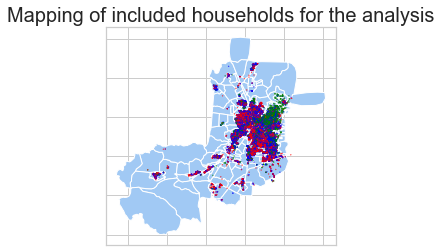

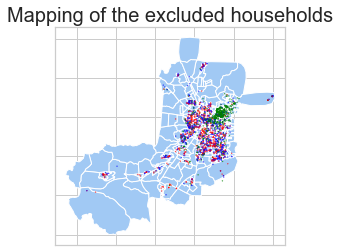

In the above plots the following colors are applied:


In [293]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from IPython.display import HTML as html_print

# https://stackoverflow.com/questions/16816013/is-it-possible-to-print-using-different-colors-in-ipythons-notebook
def cstr_black(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_green(s, color='green'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_red(s, color='red'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_blue(s, color='blue'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr(s, color='blue'):
    return "<text style=color:{}>{}</text>".format(color, s)

# Investigating how the households are destributed over the city by mapping the datapoints on the Santiago map
    # Plot 1 - Included data
ax=santiago_zone.plot()
plt.title("Mapping of included households for the analysis", fontsize = 20)
plt.scatter(df['DirCoordX'],df['DirCoordY'],s=0.1,c=cols) #Pass on the list created by the function here. Included data
ax.set_yticklabels([])
ax.set_xticklabels([])
    # Plot 2 - excluded data
ax2=santiago_zone.plot()
plt.scatter(df_excl['DirCoordX'],df_excl['DirCoordY'],s=0.1,c = cols_excl) #Pass on the list created by the function here. Exluded data
plt.title("Mapping of the excluded households",fontsize = 20)
ax2.set_yticklabels([])
ax2.set_xticklabels([])
plt.show()

# Print
print('In the above plots the following colors are applied:')
left1, word1, right1 = '' ,'red = CLASE_1,', '' # Definition of words for print
left2, word2, right2 = '' ,'blue = CLASE_2,', '' # Definition of words for print
left2, word3, right2 = '' ,'green = CLASE_3', '' # Definition of words for print

html_print(cstr(' '.join([cstr(word1, color='red'), cstr(word2, color='blue'), cstr(word3, color='green')]), color='black') )


On the above scatter plot it a first glans of how the observations are distributed across the city seen. At the same time different households are market with colors indicating which class they are in. As it can be seen on the first map it is observed that class 3 households are more gathered than the other two classes, this could indicate that the city is having a preferd area for this kind of households. 

The center of the city is clearly marked with the amount of households. To ensure that this observation is correct, a concentration plot is constructed in the following:

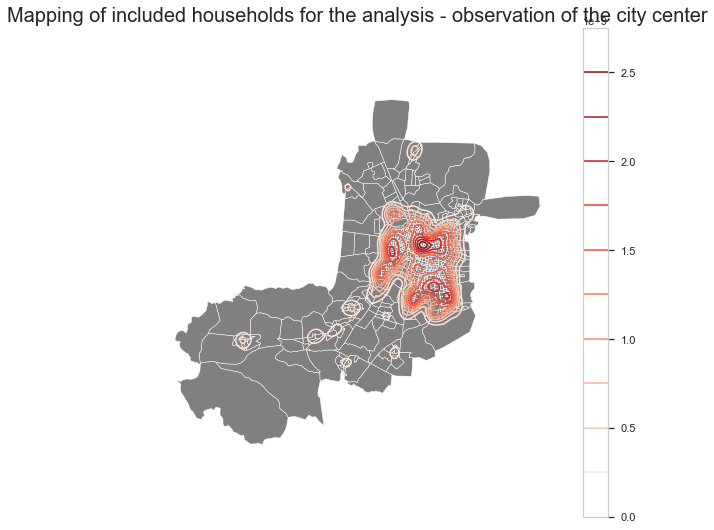

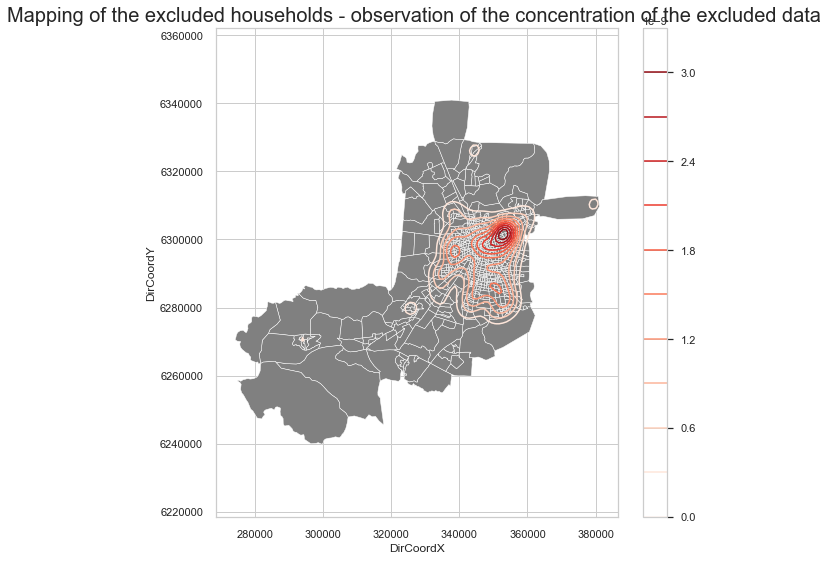

In [294]:
f, ax = plt.subplots(1, figsize=(9, 9))
santiago_zone.plot(color='grey', linewidth=0.5, ax=ax)
sns.kdeplot(df['DirCoordX'], df['DirCoordY'], shade=False, cmap='Reds', ax=ax,shade_lowest=False,cbar=True);
plt.title("Mapping of included households for the analysis - observation of the city center", fontsize = 20)
ax.set_axis_off()
plt.axis('equal')

f2, ax2 = plt.subplots(1, figsize=(9, 9))
santiago_zone.plot(color='grey', linewidth=0.5, ax=ax2)
sns.kdeplot(df_excl['DirCoordX'], df_excl['DirCoordY'], shade=False, cmap='Reds', ax=ax2,shade_lowest=False,cbar=True);
plt.title("Mapping of the excluded households - observation of the concentration of the excluded data ",fontsize = 20)
ax.set_axis_off()
plt.axis('equal')
plt.show()

As mentioned the city center has a high concentration of our observations households which is clearly shown in the above plot. Additionally, it is shown that the excluded data is more concentrated in the north east (upper right) corner. 
###### ????
This is consistent with the observation of the high number of households in the city center. 
###### ????
Based on the visualisations described in this section there is a much better foundation for exploration of the data.

### Distribution
To get an idea of the distribution of the features histograms are illustrated below. This is done so we gain more insight in the dataset, and maybe detect possible outliers. Or if we should use different transformation techniques on our data, to retrieve more knowlegde from it. Not all features are relevant for us to look at, so some of them are overlooked in this part.


<Figure size 5760x360 with 0 Axes>

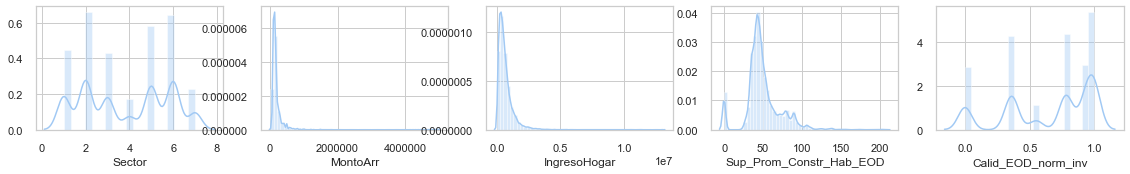

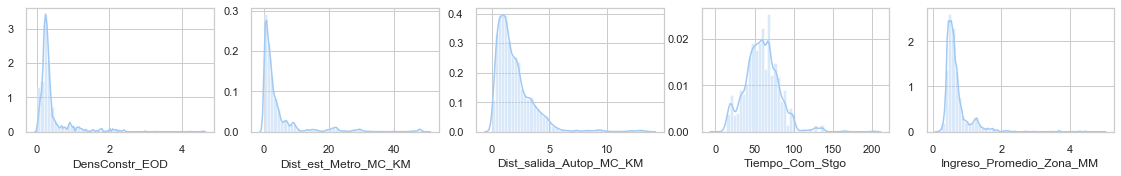

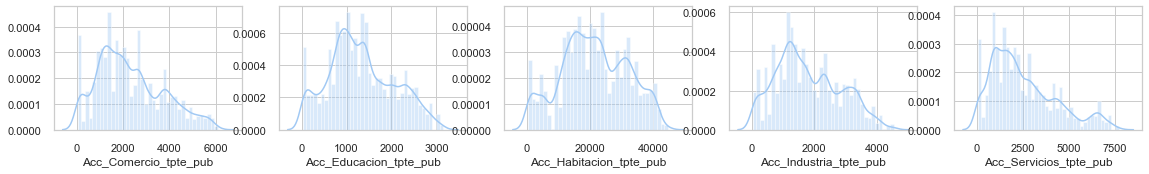

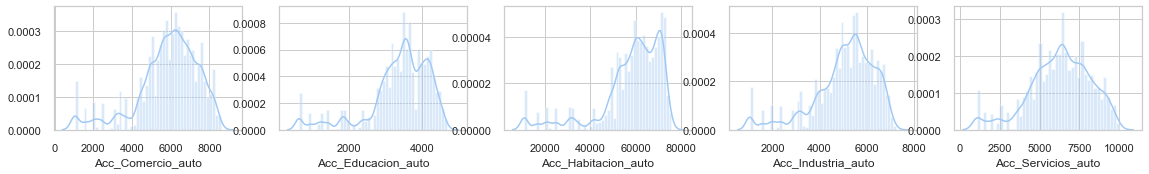

<Figure size 5760x360 with 0 Axes>

In [197]:
# Gained inspiration from:
# http://nbviewer.jupyter.org/github/PBPatil/Exploratory_Data_Analysis-Wine_Quality_Dataset/blob/master/winequality_white.ipynb

df_distribution = df.copy() #creating a dataframe to investigate the distribution
del df_distribution['DirCoordX'], df_distribution['DirCoordY'],df_distribution['CLASE'],df_distribution['CLUSTER7'],df_distribution['CLUSTER2']

l = df_distribution.columns.values
number_of_columns=len(df_distribution.columns)
number_of_rows = len(l)/number_of_columns
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(0,5):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_distribution[l[i]],kde=True) 
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(5,10):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_distribution[l[i]],kde=True) 
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(10,15):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_distribution[l[i]],kde=True) 
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
for i in range(15,20):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_distribution[l[i]],kde=True) 
plt.figure(figsize=(4*number_of_columns,5*number_of_rows))
#for i in range(20,len(l)):
#    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
#    sns.distplot(df_distribution[l[i]],kde=True) 
#plt.figure(figsize=(4*number_of_columns,5*number_of_rows))


###### Comment on distribution
On the above plots of the 20 investigated features, their distributions are illustrated. On behalf of this something need to be addressed: 

 > features like: *MontoArr*, *IngresoHogar*, *DensConstr_EOD*, *Dist_est_Metro_MC_KM*, *Dist_salida_Autop_MC_KM*, and *Ingreso_Promedio_Zona_MM* are all really skewed features, meaning that their peak (mode) is smaller than their median that is smaller than their mean. A possible solution could be to transform some of these fatures by applying log so the distribution will be more spread out, and easier for the later models to identify differences. 

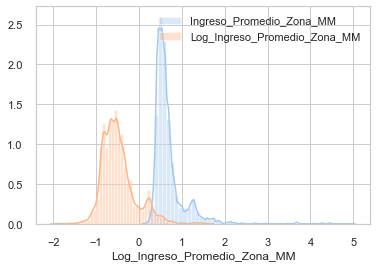

In [198]:
# Transform Ingreso_Promedio_Zona_MM with logarihtm
df_distribution['Log_Ingreso_Promedio_Zona_MM']=np.log(df_distribution['Ingreso_Promedio_Zona_MM'])
sns.distplot(df_distribution['Ingreso_Promedio_Zona_MM'],kde=True,label='Ingreso_Promedio_Zona_MM') 
sns.distplot(df_distribution['Log_Ingreso_Promedio_Zona_MM'],kde=True,label='Log_Ingreso_Promedio_Zona_MM')
plt.legend()

> The feature *Sub_Prom_Constr_Hab_EOD* are having its first mode around 0, and it should be investigated if this are possible outliers that should be removed. 

When looking at the $10$ accesibility features some simularities can easily be seen. Expecially the first five accecibility features corresponding to public transport. They are having almost identical distributions patterns with two to three peaks a the same place, even though they are having different values.  
The same is the case when looking at the accecibility by car, however this are more negatively skewed where the public acc. are positively skewed. These simularities will be investigated further when we are doing correlation checks, and PCA.

It should also be noted that a feature like *MontoArr* is distributed across a very large range of values. This will be addressed later as it could be possible outliers that is due to this narrow peak. 

###### ?????
As a further investigation it could be a good idea to look at a scatterplot of two features on the same time, this gives an indicating of the correlation between the two features. As seen below the accessibility to commerce in both transit and car is plotted up against eachother. This is a good way to illustrated the correlation, as it also will be mentioned later. It is seen that whenever the accessibility exceed with car the accessibility with public transport will also exceed.

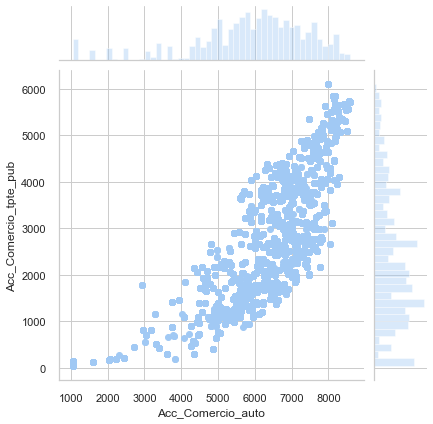

In [199]:
# I dont think we should use this /JD
sns.jointplot('Acc_Comercio_auto', 'Acc_Comercio_tpte_pub', data=df);

###### ?????

### Mapping with contour

We have seens the distributions, but is it possible to see patterns on how the different fatures are spread throughout the city? This is investigated further by plotting features into the scatterplot. 

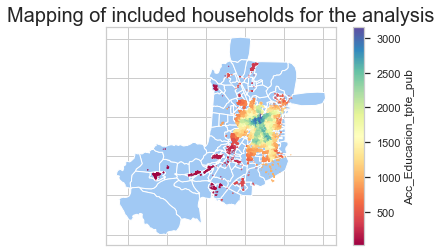

In [200]:

# Plot 1 - Included data

#c sequence
c = df['Acc_Educacion_tpte_pub']

ax=santiago_zone.plot()
plt.title("Mapping of included households for the analysis", fontsize = 20)
plt.scatter(df['DirCoordX'],df['DirCoordY'],s=0.1,c=c,cmap = 'Spectral') #Pass on the list created by the function here. Included data
ax.set_yticklabels([])
ax.set_xticklabels([])
cbar = plt.colorbar()
cbar.set_label('Acc_Educacion_tpte_pub')


In [201]:
Accesibility = ['MontoArr',
       'Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD',
       'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo',
       'Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub',
       'Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto', 'CLUSTER7', 'CLUSTER2']

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\plotting.py:480: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


<Figure size 432x288 with 0 Axes>

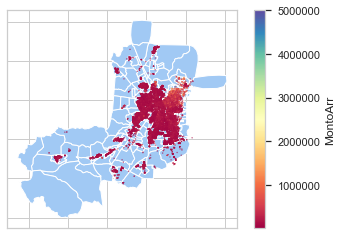

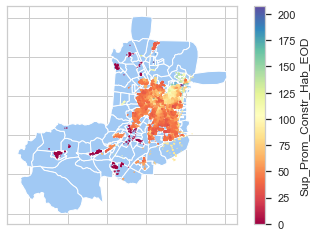

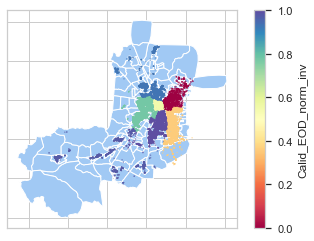

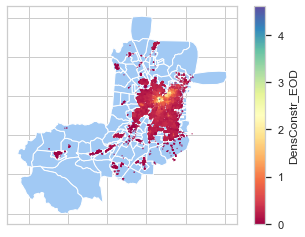

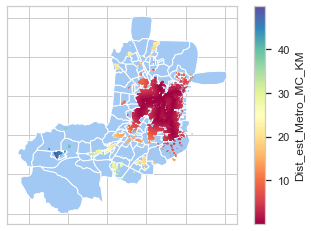

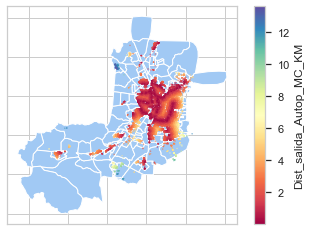

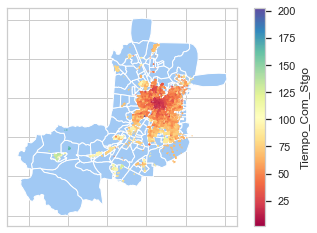

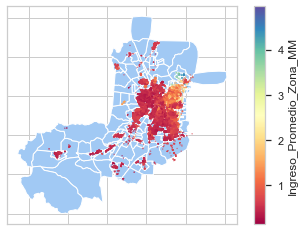

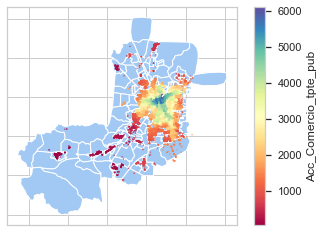

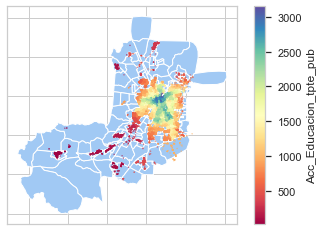

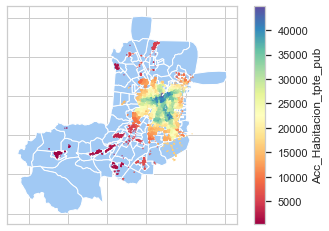

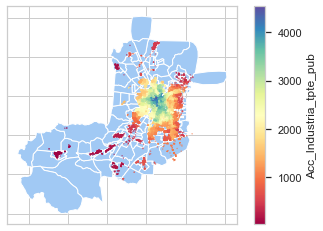

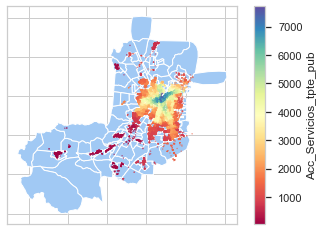

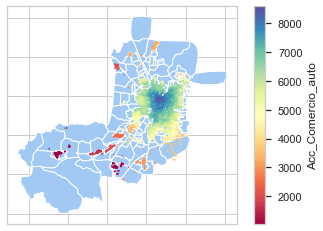

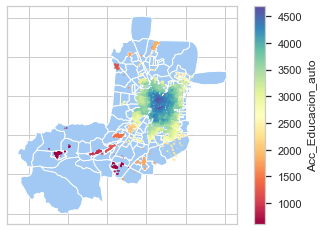

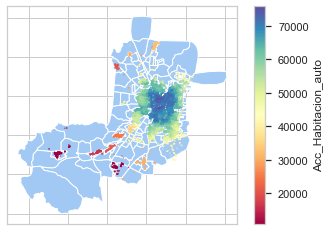

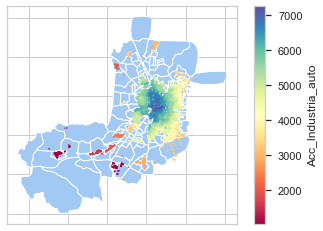

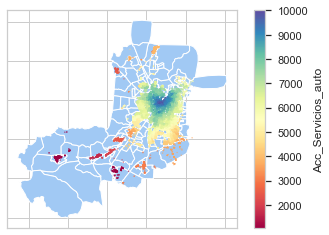

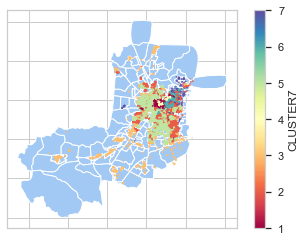

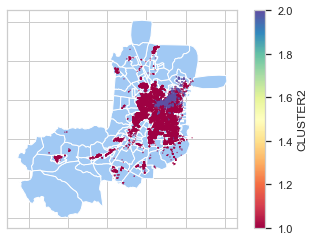

In [202]:
for i, acc in enumerate(Accesibility):
    # Plot 1 - Included data
    #c sequence
    c = df[acc]
    plt.figure(i)
    #plt.title("Mapping of included households for the analysis", fontsize = 20)
    ax=santiago_zone.plot()
    plt.scatter(df['DirCoordX'],df['DirCoordY'],s=0.1,c=c,cmap = 'Spectral') #Pass on the list created by the function here. Included data
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    cbar = plt.colorbar()
    cbar.set_label(acc)
plt.show()

###### Comment

### Boxplots

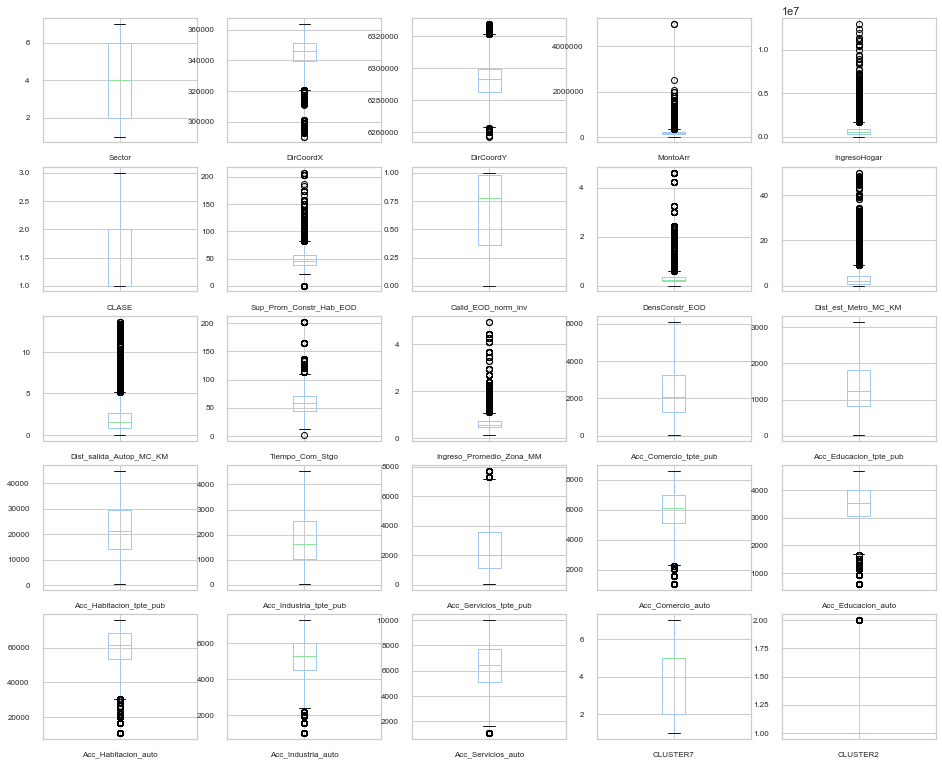

In [203]:
# boxplot not containing classes
df.plot.box(subplots=True,figsize=(16,16),by = df.columns,layout=(6, 5),fontsize = 8);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot inte

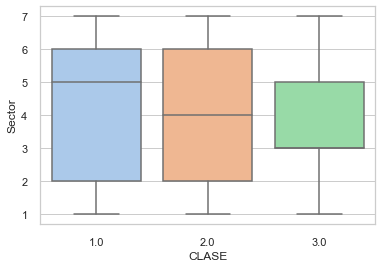

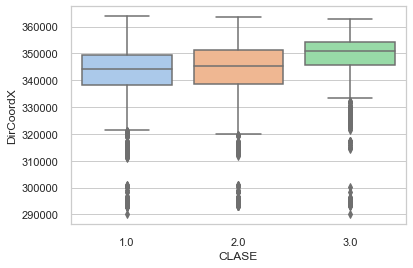

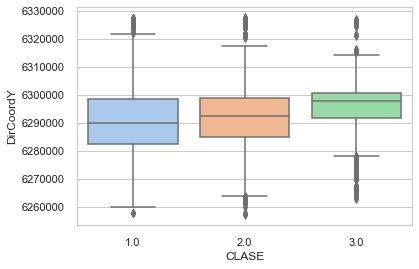

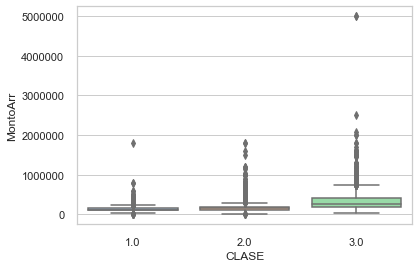

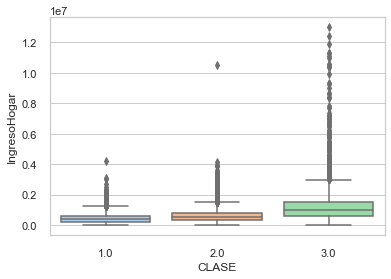

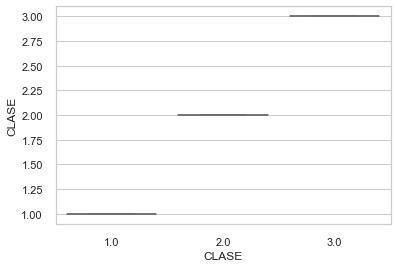

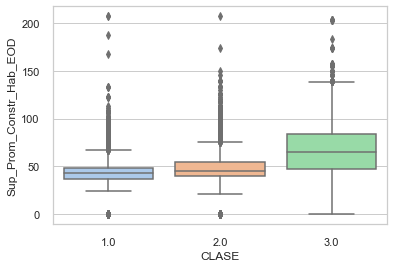

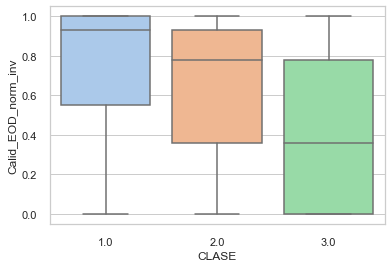

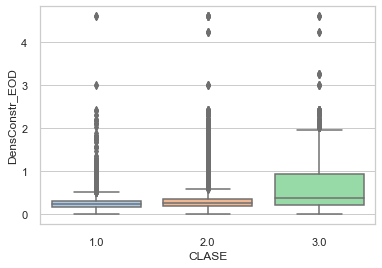

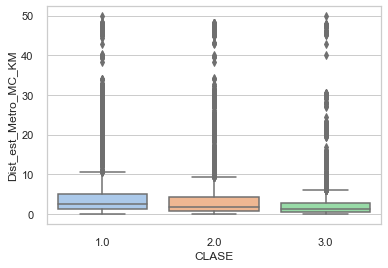

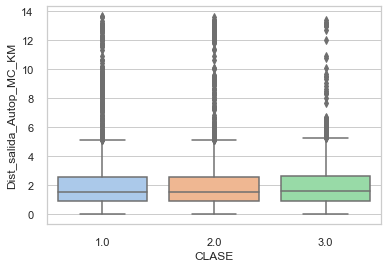

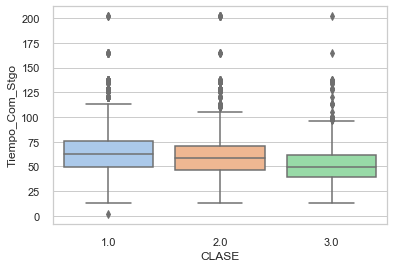

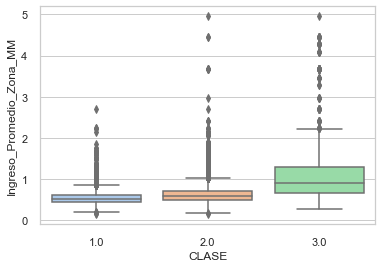

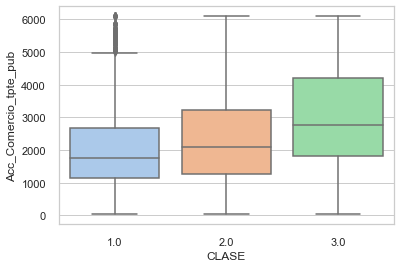

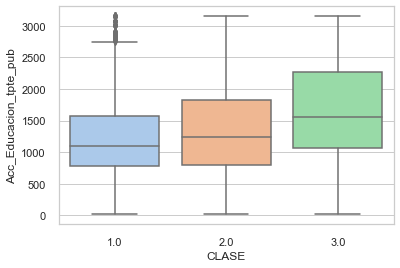

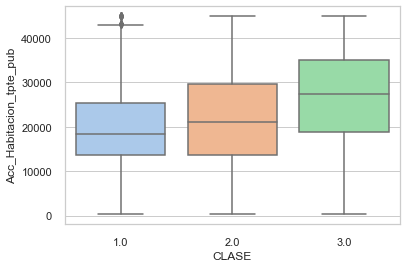

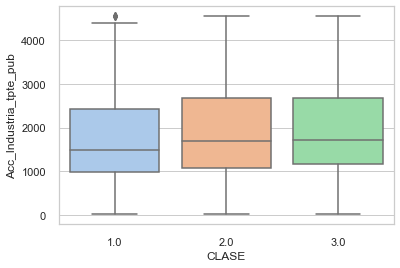

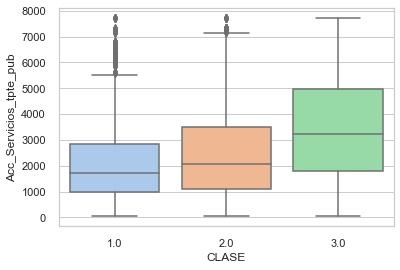

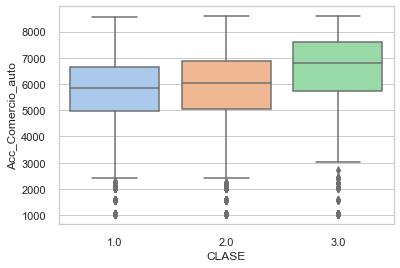

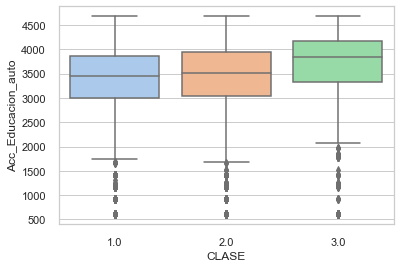

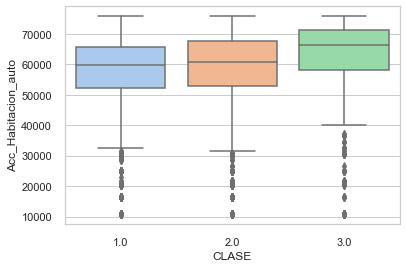

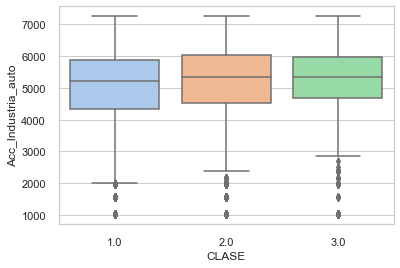

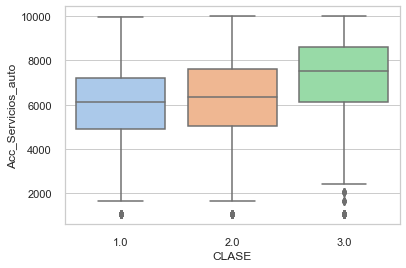

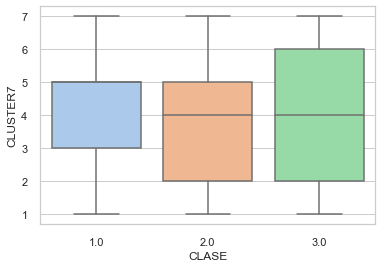

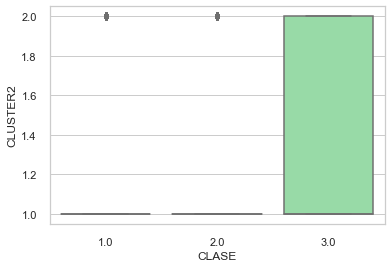

In [204]:
# boxplot containing classes 
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.boxplot(x=df['CLASE'], y=df[col])
plt.show()

As seen on the boxplots several features have values in a large range. 
The two features showing the coordinates seem to have compressed boxes. This implies that the values are not equally spread and this tendency is aligned with the map, that shows house holds spread around Santiago. The concentration of households is more dense in some areas.

The feature *MontoArr* shows the rent of the household. From the boxplot it is clear, that some households have a significant higher rent than others. The higher values, which can be seen as outliers, are all chosen to be included and not excluded as they are still telling for the depending variable.

When evaluating what outliers to remove, the meaning of the feature has been considered. For instance, the feature *Tiempo_Com_Stgo* has values that are zero. On the boxplot it is shown as an outlier, but the datapoint is feasible as it is possible to have 0 minutes in travel time. Another example is for *Sup_Prom_constr_Hab_EOD* where there are also some outliers with a value of zero. The feature means *Average Built surface of residential units in Zone* and as it is possible to have zero surface built.
By following this approach the feasibility of an outlier for each features has been considered.

###### Comment on Monto outlier that is removed

In [205]:
df_boxplot_Monto = df.loc[df['MontoArr']<5000000]

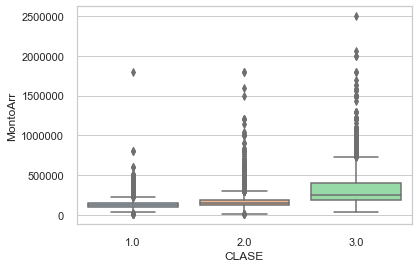

In [206]:
sns.boxplot(x=df['CLASE'], y=df_boxplot_Monto['MontoArr'])

In the above box plot it is clear that the mean rent for CLASE 3 is significantly higher than the remaning two classees. Which indicate that it is an important feature when deturming the class later.

### Correlation

It is of high interest to investigate the correlation of among the variables. It is important to avoid variables with high correlation. Firstly, the correlation matrix is investigated to analyse the correlation among the included variables. In the following matrix, the scale is shown to the right, where black is highly correlated and white is highly negative correlated.

###### Mention something about correlation at discret varibales

In [207]:
df_correlation = df.copy()
del df_correlation['Sector'],df_correlation['DirCoordX'],df_correlation['DirCoordY'],df_correlation['CLASE'],df_correlation['CLUSTER7'],df_correlation['CLUSTER2']

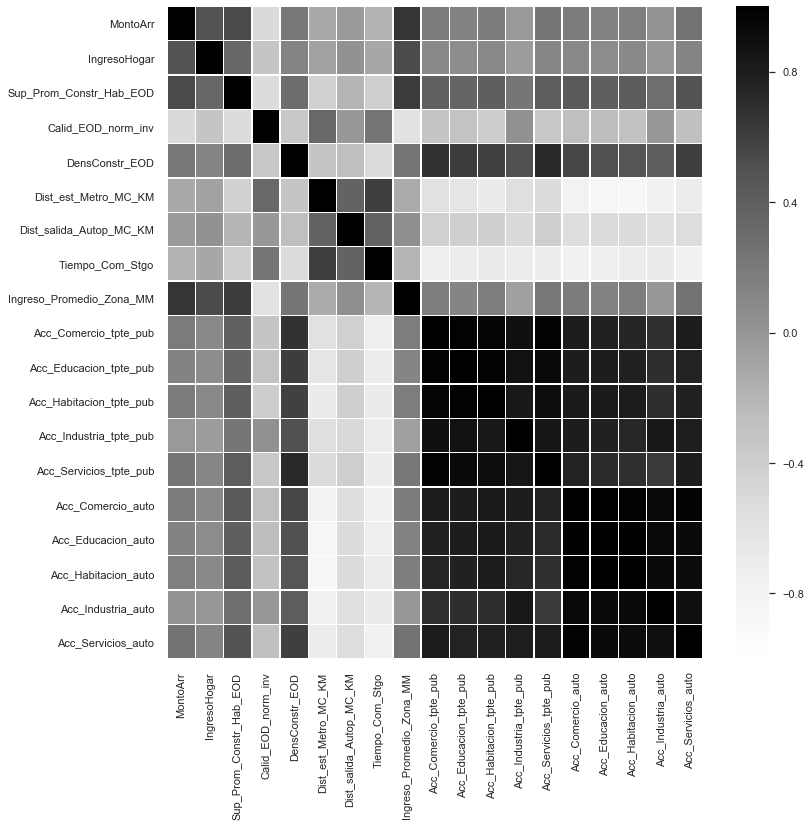

In [208]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df_correlation.corr(), annot = False,vmin=-1, vmax=1, center= 0,cmap= "Greys", linewidths=0.5); #Plotting a correlation matrix containing

From the correlation matrix above, it is noticed that the accessibility features are all highly correlated. This indicates that we do not need all of these when determining the dependent variable. A deep dive on selected features in a more detailed correlation matrix is therefore created in order to investigate their general correlation with the CLASE and decide which features to keep in the model.

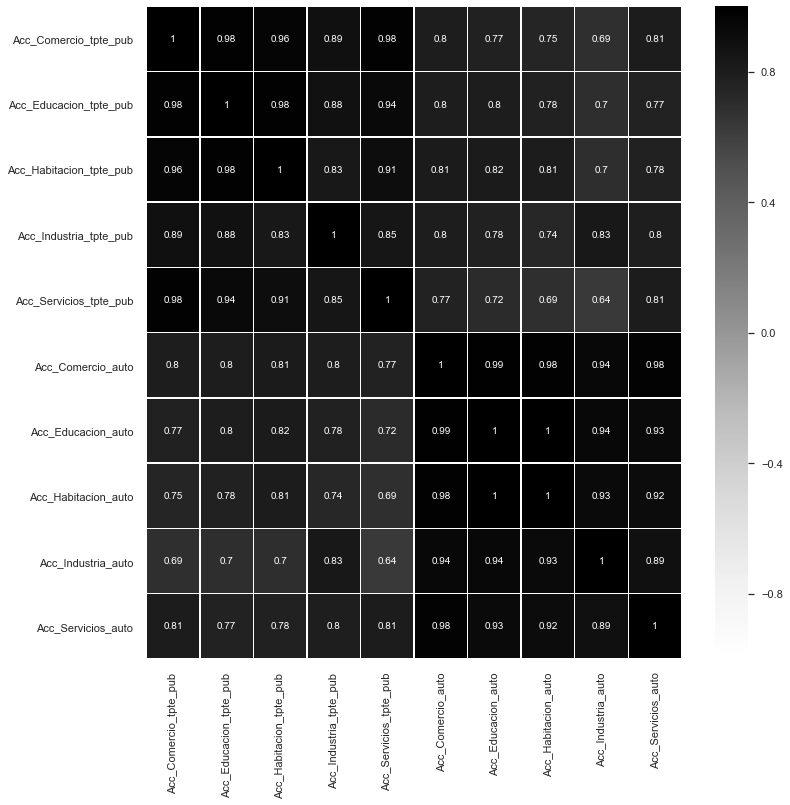

In [209]:
acc = df[['Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto']] # Features for further investigation

acc_corr = acc.corr() # Construction of the correlation matrix

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(acc.corr(), annot = True,vmin=-1, vmax=1, center= 0,cmap= "Greys", linewidths=0.5);

###### Comment

A good idea on how to deal with the highly correlated accecibility features is to use principal component analysis. This will be discused in the next section.

### Principal component analysis (PCA)

Instead of just removing some of the accecibility variables because they are highly correlated with eachother and by this loss some variation in the data set, we can instead use the principal component analysis (PCA) to transform the 10 accesibility variables into new features that still explain the majority of the variation in the data. 

In [210]:
from sklearn import decomposition # importing the used packages 

pca=decomposition.PCA() # create a PCA component

# We want to investigate the following features and the PCA
acc = acc[['Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub',
       'Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto',
       'Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto',
       'Acc_Servicios_auto']]

accT = acc.T # Transpose the matrix

In [211]:
pca.fit(accT) # Fit the PCA on the transposed data
pca.explained_variance_ratio_ # Investigating the eigenvalues 

array([9.86550588e-01, 1.31460251e-02, 1.91586584e-04, 7.24156690e-05,
       2.88575306e-05, 7.04071293e-06, 2.39875214e-06, 8.47926098e-07,
       2.40114573e-07, 5.18865412e-32])

In [212]:
# Creating a cumulative array, to see how much the components explaine of the data
expl = pca.explained_variance_ratio_
cdf = np.cumsum(expl) # cumulative array of the ratio
print(cdf)

[0.98655059 0.99969661 0.9998882  0.99996061 0.99998947 0.99999651
 0.99999891 0.99999976 1.         1.        ]


It is seen from the above cumulative array that a lot of the variation in the data is well explained by the first principal component. $98.65 \%$ of the variation is explained by the first. Which is above our decided threshold at $95 \%$. 

In [354]:
# Inset our first principal component in the dataframe
pca_Acc = pca.components_[0] 
df['pca_Acc'] = pca_Acc

### Correlation on classes
In order to spot tendencies between each class with the specific features, then the class (CLASE) is encoded into the three categories:

In [214]:
# The following code is from lecture material to construct dummies in CLASE
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(df,"CLASE") # The dummies are created from CLASE

data = data.drop(['CLASE','DirCoordX','DirCoordY'],axis =1) # After the creation of the dummies, 
                                                            # the CLASE column is removed

Now it will be investigated what columns are highly correlated with the three categories. Top 10 highest correlated features are found for each category of the dependent variable.

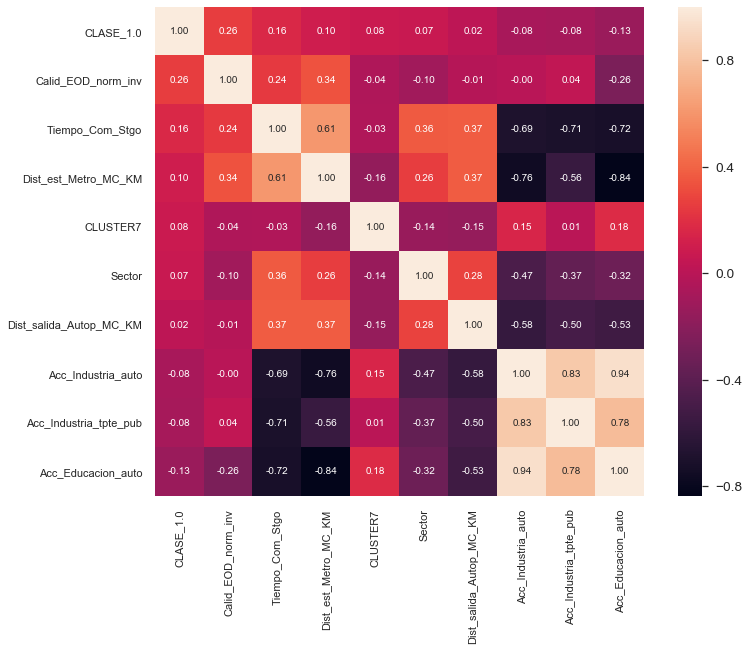

  Most Correlated Features
0                CLASE_1.0
1       Calid_EOD_norm_inv
2          Tiempo_Com_Stgo
3     Dist_est_Metro_MC_KM
4                 CLUSTER7
5                   Sector
6  Dist_salida_Autop_MC_KM
7       Acc_Industria_auto
8   Acc_Industria_tpte_pub
9       Acc_Educacion_auto


In [215]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
k = 10 #number of variables for heatmap
cols_C = corrmat.nlargest(k, 'CLASE_1.0')['CLASE_1.0'].index
cm = np.corrcoef(data[cols_C].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_C.values, xticklabels=cols_C.values)
plt.show()

# The following code constructs a list of the top 10 highest correlated features with the dependent variable
most_corr = pd.DataFrame(cols_C)
most_corr.columns = ['Most Correlated Features']
print(most_corr)

From this matrix it is shown that the above features are the most correlated with CLASE_1. The first row in the above table must be excluded as CLASE_1 is correlated with itself.

It is now investigated if this is also the case for CLASE_2 (same approach applied):

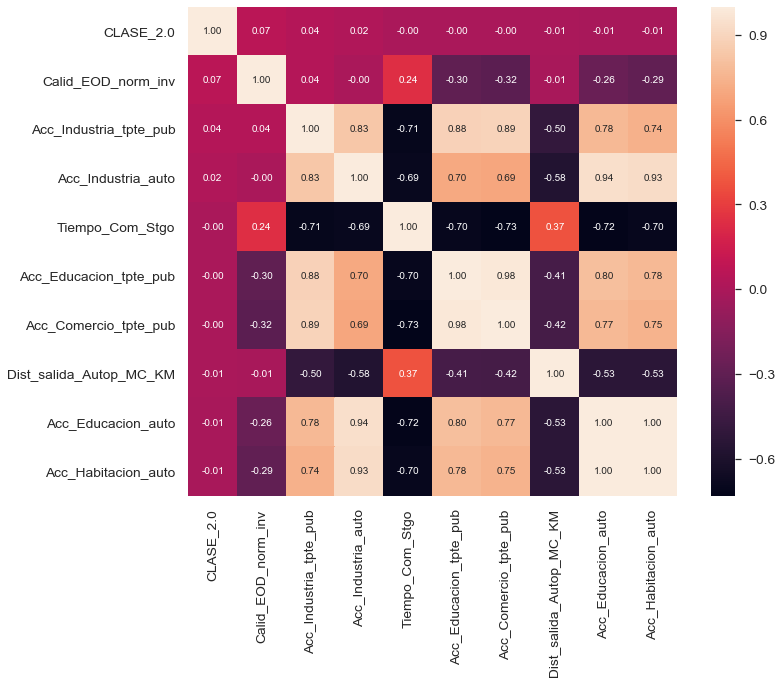

  Most Correlated Features
0                CLASE_2.0
1       Calid_EOD_norm_inv
2   Acc_Industria_tpte_pub
3       Acc_Industria_auto
4          Tiempo_Com_Stgo
5   Acc_Educacion_tpte_pub
6    Acc_Comercio_tpte_pub
7  Dist_salida_Autop_MC_KM
8       Acc_Educacion_auto
9      Acc_Habitacion_auto


In [216]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
k = 10 #number of variables for heatmap
cols_C = corrmat.nlargest(k, 'CLASE_2.0')['CLASE_2.0'].index
cm = np.corrcoef(data[cols_C].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_C.values, xticklabels=cols_C.values)
plt.show()

most_corr = pd.DataFrame(cols_C)
most_corr.columns = ['Most Correlated Features']
print(most_corr)

In the above table, feature 1 and 2 ar both the same as for CLASE_1. After those two features there are differences between CLASE_1 and CLASE_2. This means, that for instance the average construction quality can tell a lot about the CLASE categories.

The the same approach will be applied for CLASE_3:

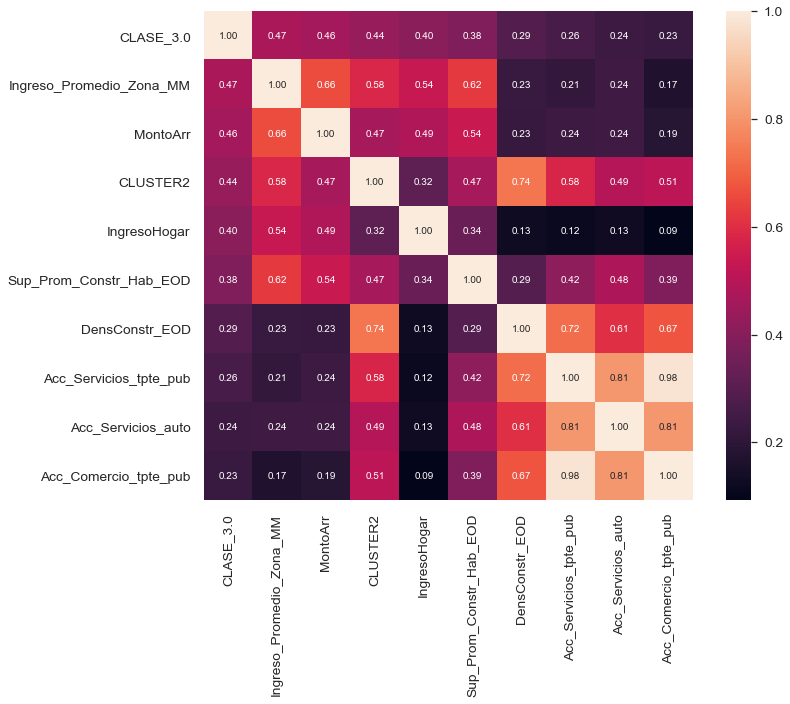

   Most Correlated Features
0                 CLASE_3.0
1  Ingreso_Promedio_Zona_MM
2                  MontoArr
3                  CLUSTER2
4              IngresoHogar
5   Sup_Prom_Constr_Hab_EOD
6            DensConstr_EOD
7    Acc_Servicios_tpte_pub
8        Acc_Servicios_auto
9     Acc_Comercio_tpte_pub


In [217]:
# Correlation Matrix Heatmap
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
k = 10 #number of variables for heatmap
cols_C = corrmat.nlargest(k, 'CLASE_3.0')['CLASE_3.0'].index
cm = np.corrcoef(data[cols_C].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols_C.values, xticklabels=cols_C.values)
plt.show()

most_corr = pd.DataFrame(cols_C)
most_corr.columns = ['Most Correlated Features']
print(most_corr)

For CLASE_3 it is a different case. Here the two first features are very different and are here about the zonal income and the monthly rent. This implies, that when having a low or high rent it will be a significant indicator for the class of household.
Based on this observation it is now investigated if it can be analysed further.

In [218]:
# Inset rest

#(a)  Load data and simple observations of data (number of rows etc.)
#(b)  Check of missing data (what kind of data is excluded?)
#(c)  Removal of unnecessary data
#(d)  First data exploration14.what is meant with this?
    #(i)  Mapping
    #(ii)  Distributions, boxplots etc
    #(iii)  PCA analysis

# Exploratory component

## Additional data

To extend our dataset it is decided to add additional data about Santiago de Chile. In the following we will ......

Number of parks in Santiago: 16


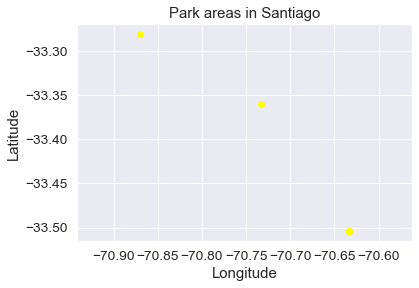

In [36]:
# Getting new data, ????? data of Santiago

# Import additional packages
import requests
import json
import geopy.distance

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="CL"][admin_level=2];
(node[leisure=park](area);
 way[leisure=park](area);
 rel[leisure=park](area);
);
out center;
"""

#leisure=...
#amenity=...
#sport=...

response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()


# Collect coords into list
coords = []
LAT = []
LON = []
for element in data['elements']:
    if element['type'] == 'node':
        if element['lat']>-33.9:
            if element['lat']<-33.1:
                if element['lon']<-70.4:
                    if element['lon']>-71.3:
                        lon = element['lon']
                        lat = element['lat']
                        coords.append((lon, lat))
                        LAT.append(lat)
                        LON.append(lon)
    elif 'center' in element:
        if element['lat']>-33.9:
            if element['lat']<-33.1:
                if element['lon']<-70.4:
                    if element['lon']>-71.3:
                        lon = element['center']['lon']
                        lat = element['center']['lat']
                        coords.append((lon, lat))
                        LAT.append(lat)
                        LON.append(lon)

print('Number of parks in Santiago:', len(coords))
                
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o', c='Yellow')
plt.title('Park areas in Santiago')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()




In [37]:
X = np.array(coords) 

import utm #https://github.com/Turbo87/utm, how the UTM packaged works

# Converter from UTM coordinates to Longitude and Latitude coordinates, and updating DirCoordX and DirCoordY in the dataframe
Y = []
Y.append(utm.from_latlon(X[:, 1],X[:, 0]))
Y=np.array(Y)

CoordX = Y[0,0] # latitude coordinates for the new feature
CoordY = Y[0,1] # longitude coordinates for the new feature

To calculate the minimum distance from our new feature to every observation we are using the package shapely, however it was first tried to calculate the distances in a for-loop by using latitude and longitude coordinates for both the observations and new features. This turned out to be extremely slow when the amount of objects in the new feature increased.

In [38]:
from shapely.geometry import Point

#Knowlegde and use of the package is collected here: https://shapely.readthedocs.io/en/stable/manual.html
V = []
for i in range(len(Y[0,0])):
    V.append(Point(Y[0,0][i],Y[0,1][i]))

In [39]:
# Defining two functions:
# 1) The first is calculating the distance from all observations in the dataframe to all 
#    objects in the new feature
# 2) The second is calculating the minimum distance for an observation in the dataframe 
#    to the new feature

def dist_point(dataF,newFeature):
    #Point(0,0).distance(Point(1,1))
    Dist = []
    for P in newFeature:
        Dist.append(dataF.geometry.distance(P))
    return Dist

def Min_dist(Dist):
    DataFra = pd.DataFrame(Dist)
    Min_D = []
    for h in DataFra.columns:
        Min_D.append(min(DataFra[h]))
    return Min_D

To get a change to evaluate our new feature, there will be create a geometry point for all our observations. See below:

In [40]:
#Creating a geometry point of our data
df = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.DirCoordX,df.DirCoordY))
#Creating a geometry point of our data
df_excl = gpd.GeoDataFrame(df_excl, geometry=gpd.points_from_xy(df_excl.DirCoordX,df_excl.DirCoordY)) 

In [41]:
Distance_to_all_NF = dist_point(df, V)
Min_dist_to_NF=Min_dist(Distance_to_all_NF) # The output of the Min_dist_to_NF is in meters

[]

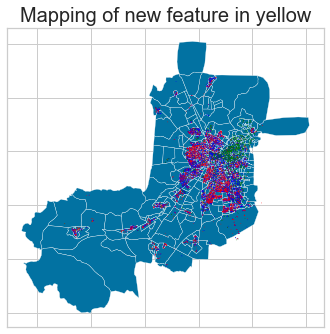

In [127]:
# https://stackoverflow.com/questions/16816013/is-it-possible-to-print-using-different-colors-in-ipythons-notebook
def cstr_black(s, color='black'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_green(s, color='green'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_red(s, color='red'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr_blue(s, color='blue'):
    return "<text style=color:{}>{}</text>".format(color, s)
def cstr(s, color='blue'):
    return "<text style=color:{}>{}</text>".format(color, s)

# Investigating how the households are destributed over the city by mapping the datapoints on the Santiago map
    # Plot 1 - Included data
ax=santiago_zone.plot()
plt.title("Mapping of new feature in yellow", fontsize = 20)
plt.scatter(df['DirCoordX'],df['DirCoordY'],s=0.1,c=cols) #Pass on the list created by the function here. Included data
plt.scatter(CoordX,CoordY,s=20,c='Yellow') 
ax.set_yticklabels([])
ax.set_xticklabels([])


## Research questions

### Q1 (from assignement)

### Q2 
How is house rent distributed across the city? Is the a correlation between the level of construction quality and the house rent? And is different areas of the city charactorized by specific rent levels?

This will be investigated further. 



In [43]:
# 1) Prediction 
# 2) Cluster
# Tjek korrelation med rent og se hvad de betaler mest for. Tjek graf mellem construction quality og rent

# Undersøg om folk, der tjener mere også betaler mere og er længere uddannet (CLUSTER)
# Overvej hvad en ejendomsmægler gerne vil bruge for at vide hvem der flytter ind (se ovenstående)
# 

### Q3)


In [ ]:
##########################################################################################

In [46]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [295]:
df_clusters_selected = df_clusters[['IngresoHogar','MontoArr','AnosEstudio']]
# df_clusters_selected = df.copy()
# del df_clusters_selected['IngresoHogar']
# del df_clusters_selected['DirCoordX']
# del df_clusters_selected['DirCoordY']
# # del df_clusters_selected['geometry']
# del df_clusters_selected['CLASE']
# del df_clusters_selected['Acc_Comercio_tpte_pub']
# del df_clusters_selected['Acc_Educacion_tpte_pub']
# del df_clusters_selected['Acc_Habitacion_tpte_pub']
# del df_clusters_selected['Acc_Industria_tpte_pub']
# del df_clusters_selected['Acc_Servicios_tpte_pub']
# del df_clusters_selected['Acc_Comercio_auto']
# del df_clusters_selected['Acc_Educacion_auto']
# del df_clusters_selected['Acc_Habitacion_auto']
# del df_clusters_selected['Acc_Industria_auto']
# del df_clusters_selected['CLUSTER7']
# del df_clusters_selected['CLUSTER2']
# del df_clusters_selected['Acc_Servicios_auto']
# del df_clusters_selected['AnosEstudio']

df_clusters_selected_stand = df_clusters_selected.copy()
df_clusters_selected_stand

IngresoHogar  MontoArr  AnosEstudio
Hogar                                      
100010        450845    100000         11.0
100020       1019369    120000         11.0
100030         80000     70000         10.0
100041        559259     80000         14.0
100052        710309    117771         12.0
...              ...       ...          ...
700990        300000    100000         10.0
706781        695186    140000         12.0
706791        396715    200000         11.0
743813        318005     80000         12.0
743823        140007     80000          9.0

[16047 rows x 3 columns]

In [296]:
# ### Standardize the rest of the data (not dummies) 
# df_clusters_selected_mean = df_clusters_selected.mean(axis = 0)
# df_clusters_selected_std = df_clusters_selected.std(axis = 0)
# df_clusters_selected_stand = (df_clusters_selected - df_clusters_selected_mean) / df_clusters_selected_std


In [253]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_clusters_selected_stand)
    Sum_of_squared_distances.append(km.inertia_)

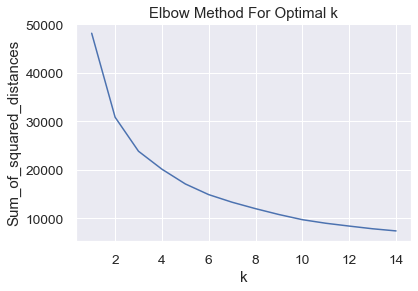

In [254]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [248]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(df_clusters_selected_stand)
    preds = km.predict(df_clusters_selected_stand)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(df_clusters_selected_stand)))
    km_scores.append(-km.score(df_clusters_selected_stand))
    
    silhouette = silhouette_score(df_clusters_selected_stand,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
#     db = davies_bouldin_score(df_clusters_selected,preds)
#     db_score.append(db)
#     print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
#     v_measure = v_measure_score(y,preds)
#     vmeasure_score.append(v_measure)
#     print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -30822.22412376441
Silhouette score for number of cluster(s) 2: 0.5636283046752807
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -23800.98629560158
Silhouette score for number of cluster(s) 3: 0.42415328792757545
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -20099.008185022656
Silhouette score for number of cluster(s) 4: 0.3213912513914731
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 5: -17059.050105104667
Silhouette score for number of cluster(s) 5: 0.3452340023643608
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 6: -14855.212252306406
Silhouette score for number of cluster(s) 6: 0.34361194686368074
------

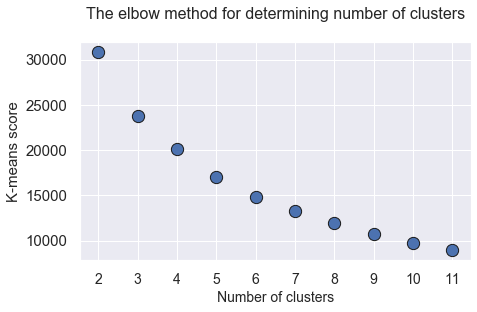

In [249]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

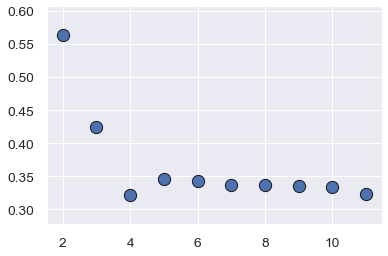

In [250]:
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("")
plt.show()

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(12, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_clusters_selected_stand)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_clusters_selected_stand, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clusters_selected_stand, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=10, fontweight='bold')
    plt.text(17527,100,'Pre')
plt.show();

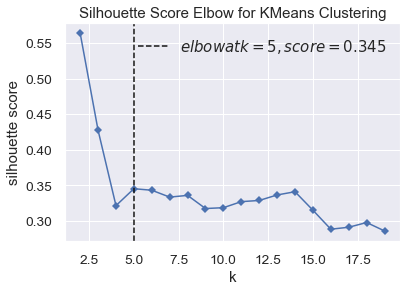

In [258]:

#https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kMeans_model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kMeans_model, k=(2,20), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(df_clusters_selected_stand)    
visualizer.poof() 

In [348]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = []
range_n_clusters = range(2,50)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_clusters_selected)
    centers = clusterer.cluster_centers_

    score = silhouette_score (df_clusters_selected, preds, metric='euclidean')
    sil_score.append(score)
#     print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

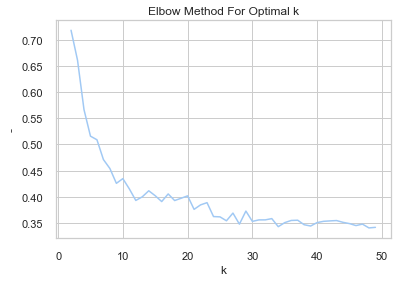

In [349]:
x = list(range(2,len(sil_score)+2))
plt.plot(x, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('-')
plt.title('Elbow Method For Optimal k')
plt.show()

In [343]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10
n_clusters_new = range(2, kmax+1)
# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(df_clusters_selected)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_clusters_selected, labels, metric = 'euclidean'))

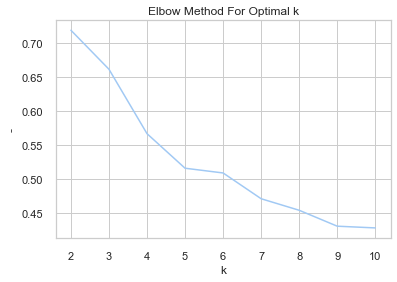

In [344]:
plt.plot(n_clusters_new, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('-')
plt.title('Elbow Method For Optimal k')
plt.show()

In [337]:
K_clusters=5
k=KMeans(K_clusters)
k.fit(df_clusters_selected_stand,df_clusters_selected.index);

In [338]:

# x=range(3)
# for c in k.cluster_centers_:
#     plt.plot(x, c)
    
 

In [339]:
df_clusters_plot= df_clusters_selected.copy()
df_clusters_plot['cluster']=k.fit_predict(df_clusters_selected)

In [340]:
df_clusters_plot

IngresoHogar  MontoArr  AnosEstudio  cluster
Hogar                                               
100010        450845    100000         11.0        1
100020       1019369    120000         11.0        4
100030         80000     70000         10.0        1
100041        559259     80000         14.0        4
100052        710309    117771         12.0        4
...              ...       ...          ...      ...
700990        300000    100000         10.0        1
706781        695186    140000         12.0        4
706791        396715    200000         11.0        1
743813        318005     80000         12.0        1
743823        140007     80000          9.0        1

[16047 rows x 4 columns]

<Figure size 432x288 with 0 Axes>

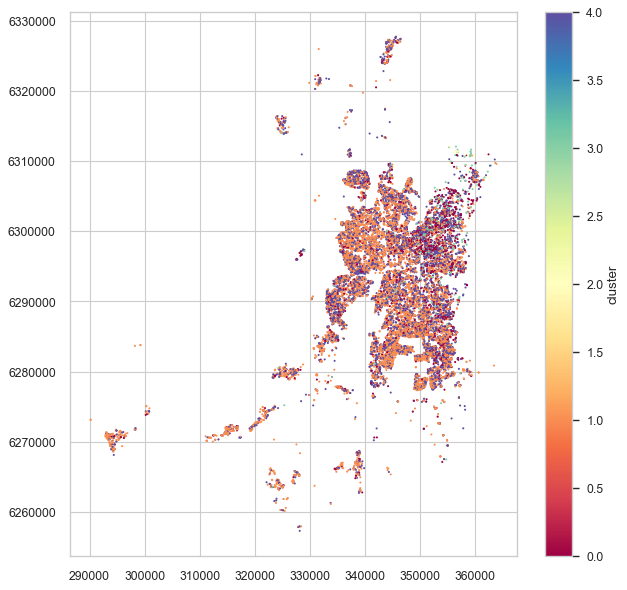

In [341]:

c = df_clusters_plot['cluster']
plt.figure(i)
#plt.title("Mapping of included households for the analysis", fontsize = 20)
# ax=santiago_zone.plot()
plt.figure(figsize=(9, 9), dpi=80)
plt.scatter(df['DirCoordX'],df['DirCoordY'],s=0.7,c=c,cmap = 'Spectral') #Pass on the list created by the function here. Included data
ax.set_yticklabels([])
ax.set_xticklabels([])
cbar = plt.colorbar()
cbar.set_label('cluster')
plt.show()

In [304]:
df_clusters_plot

IngresoHogar  MontoArr  AnosEstudio  cluster
Hogar                                               
100010        450845    100000         11.0        2
100020       1019369    120000         11.0        4
100030         80000     70000         10.0        2
100041        559259     80000         14.0        4
100052        710309    117771         12.0        4
...              ...       ...          ...      ...
700990        300000    100000         10.0        2
706781        695186    140000         12.0        4
706791        396715    200000         11.0        2
743813        318005     80000         12.0        2
743823        140007     80000          9.0        2

[16047 rows x 4 columns]

In [305]:
# df_cluster_merged=pd.merge(df[['Sector', 'DirCoordX', 'DirCoordY', 'MontoArr', 'IngresoHogar', 'CLASE','Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD','Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo','Ingreso_Promedio_Zona_MM', 'Acc_Comercio_tpte_pub','Acc_Educacion_tpte_pub', 'Acc_Habitacion_tpte_pub','Acc_Industria_tpte_pub', 'Acc_Servicios_tpte_pub', 'Acc_Comercio_auto','Acc_Educacion_auto', 'Acc_Habitacion_auto', 'Acc_Industria_auto','Acc_Servicios_auto', 'CLUSTER7', 'CLUSTER2', 'pca_Acc']], df_clusters_plot[['cluster']],right_index=True)
df_clusters_merged=pd.merge(df, df_clusters_plot[['AnosEstudio','cluster']],on = 'Hogar',left_index = True)

In [306]:
df_clusters_merged;

In [307]:
df_clusters_mean=df_clusters_merged.groupby('Hogar').agg('mean')

In [308]:
df_clusters_merged;

In [309]:
x=range(29)
for i in range(K_clusters):
    print("cluster %d, Income=%.2f, Rent=%.2f, Education= %.2f, Avg. zonal income = %.2f"%(i, np.mean(df_clusters_merged[df_clusters_merged.cluster==i]['IngresoHogar']),np.mean(df_clusters_merged[df_clusters_merged.cluster==i]['MontoArr']),np.mean(df_clusters_merged[df_clusters_merged.cluster==i]['AnosEstudio']), np.mean(df_clusters_merged[df_clusters_merged.cluster==i]['Ingreso_Promedio_Zona_MM'])))
#     print("cluster %d, Rent=%.2f"%(i, np.mean(df_clusters_mean[df_clusters_mean.cluster==i]['IngresoHogar'])))
# plt.legend();

    

cluster 0, Income=1492002.09, Rent=299146.60, Education= 14.84, Avg. zonal income = 0.96
cluster 1, Income=8353003.57, Rent=708998.62, Education= 18.69, Avg. zonal income = 2.55
cluster 2, Income=300966.88, Rent=143273.14, Education= 11.08, Avg. zonal income = 0.57
cluster 3, Income=2951506.62, Rent=548450.55, Education= 17.32, Avg. zonal income = 1.44
cluster 4, Income=764856.89, Rent=182167.78, Education= 12.45, Avg. zonal income = 0.68


In [159]:
df_clusters_merged[(df_clusters_merged.CLASE == 3) & (df_clusters_merged.cluster == 3)].count()

Sector                      50
DirCoordX                   50
DirCoordY                   50
MontoArr                    50
IngresoHogar                50
CLASE                       50
Sup_Prom_Constr_Hab_EOD     50
Calid_EOD_norm_inv          50
DensConstr_EOD              50
Dist_est_Metro_MC_KM        50
Dist_salida_Autop_MC_KM     50
Tiempo_Com_Stgo             50
Ingreso_Promedio_Zona_MM    50
Acc_Comercio_tpte_pub       50
Acc_Educacion_tpte_pub      50
Acc_Habitacion_tpte_pub     50
Acc_Industria_tpte_pub      50
Acc_Servicios_tpte_pub      50
Acc_Comercio_auto           50
Acc_Educacion_auto          50
Acc_Habitacion_auto         50
Acc_Industria_auto          50
Acc_Servicios_auto          50
CLUSTER7                    50
CLUSTER2                    50
pca_Acc                     50
geometry                    50
AnosEstudio                 50
cluster                     50
dtype: int64

In [143]:
# x_plot = np.arange(len(df_clusters_merged['cluster'].unique()))


# b1 = ax.bar(x_plot, df_clusters_merged.loc[df_clusters_merged['cluster'] == 1, 'count'])
# b2 = ax.bar(x_plot, df_clusters_merged.loc[df_clusters_merged['cluster'] == 2, 'count'])

In [171]:
count_clusters = df_clusters_merged[['CLASE','cluster']].copy()

x = np.arange(count_clusters.shape[0])
# count_clusters
dx = (np.arange(count_clusters.shape[1])-count_clusters.shape[1]/3.)/(count_clusters.shape[1]+3.)
d = 1./(count_clusters.shape[1]+3.)

fig, ax = plt.subplots(figsize=(20,9))
for i in range(count_clusters.shape[1]):
    ax.bar(x+dx[i],count_clusters[:,i], width=d, color= ['xkcd:sky blue','xkcd:dark blue','xkcd:bright blue'][i], label="{}".format(['CLASE 1','CLASE 2','CLASE 3'][i]))
# plt.title('CLASE ratio per cluster')
# plt.xlabel('Cluster')
# plt.legend(framealpha=1)
# plt.show()


In [451]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Make some fake data:
# n_series = 3
# n_observations = 4
# x = np.arange((K_clusters))
# # data = np.random.random((n_observations,n_series))
# data = df_clusters_merged['CLASE']

# # Plotting:

# fig, ax = plt.subplots(figsize=(20,5))

# # Determine bar widths
# width_cluster = 0.7
# width_bar = width_cluster/n_series

# for n in range(n_series):
#     x_positions = x+(width_bar*n)-width_cluster/2
#     ax.bar(x_positions, df_clusters_merged[:,n], width_bar, align='edge')

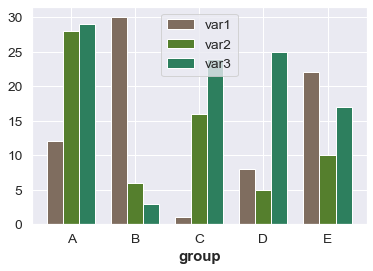

In [172]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = 
# r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Ny Clustering - More data

In [437]:
data_cluster = df.copy()
del data_cluster['IngresoHogar']
del data_cluster['DirCoordX']
del data_cluster['DirCoordY']
# del df_clusters_selected['geometry']
del data_cluster['CLASE']
del data_cluster['Sector']
del data_cluster['Acc_Comercio_tpte_pub']
del data_cluster['Acc_Educacion_tpte_pub']
del data_cluster['Acc_Habitacion_tpte_pub']
del data_cluster['Acc_Industria_tpte_pub']
del data_cluster['Acc_Servicios_tpte_pub']
del data_cluster['Acc_Comercio_auto']
del data_cluster['Acc_Educacion_auto']
del data_cluster['Acc_Habitacion_auto']
del data_cluster['Acc_Industria_auto']
del data_cluster['CLUSTER7']
del data_cluster['CLUSTER2']
del data_cluster['Acc_Servicios_auto']
# del data_cluster['AnosEstudio']


In [438]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sil_score = []
range_n_clusters = range(2,50)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(data_cluster)
    centers = clusterer.cluster_centers_

    score = silhouette_score (data_cluster, preds, metric='euclidean')
    sil_score.append(score)
#     print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

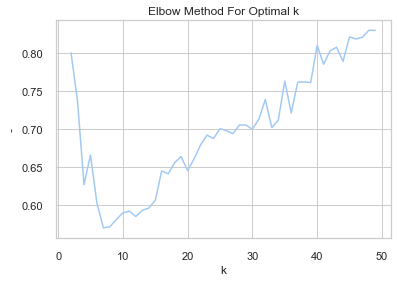

In [439]:
x = list(range(2,len(sil_score)+2))
plt.plot(x, sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('-')
plt.title('Elbow Method For Optimal k')
plt.show()

In [440]:
Sum_of_squared_distances = []
K = range(2,50)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_cluster)
    Sum_of_squared_distances.append(km.inertia_)

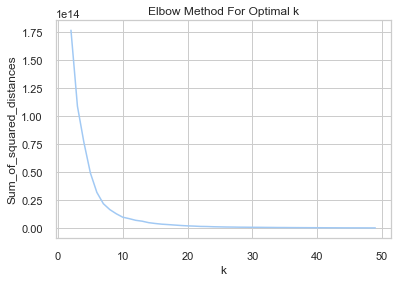

In [441]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

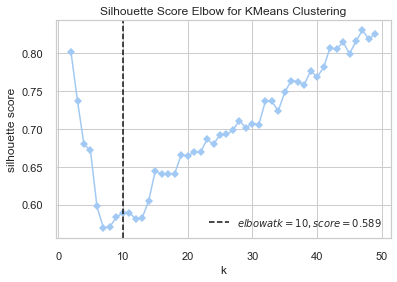

In [442]:

#https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
kMeans_model = KMeans(random_state=42)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(kMeans_model, k=(2,50), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(data_cluster)    
visualizer.poof() 

In [443]:
data_cluster

MontoArr  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  DensConstr_EOD  \
Hogar                                                                           
100010    100000                     53.8                0.98           0.059   
100020    120000                     59.6                0.98           0.033   
100030     70000                     59.5                0.98           0.004   
100041     80000                     59.5                0.98           0.004   
100052    117771                     43.6                0.98           0.086   
...          ...                      ...                 ...             ...   
700990    100000                     59.6                0.98           0.033   
706781    140000                     48.3                0.78           0.276   
706791    200000                     48.3                0.78           0.276   
743813     80000                     40.6                1.00           0.308   
743823     80000                     34.1                1.00           0.255   

        Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  Tiempo_Com_Stgo  \
Hogar                                                                    
100010             23.051711                 4.345179             69.0   
100020             21.080177                 1.381521             84.0   
100030             34.147894                11.993389             83.0   
100041             34.147817                11.993268             83.0   
100052             19.908792                 1.363177             94.0   
...                      ...                      ...              ...   
700990             22.433675                 0.423618             84.0   
706781              1.546902                 2.385991             49.0   
706791              1.592518                 2.357746             49.0   
743813              1.739248                 1.799916             54.0   
743823              1.800604                 1.812641             45.0   

        Ingreso_Promedio_Zona_MM   pca_Acc  
Hogar                                       
100010                  0.519765  0.003903  
100020                  0.678317  0.003903  
100030                  0.408158  0.003903  
100041                  0.408158  0.003903  
100052                  0.498140  0.003903  
...                          ...       ...  
700990                  0.678317  0.003903  
706781                  0.415796  0.007721  
706791                  0.415796  0.007721  
743813                  0.428417  0.008488  
743823                  0.334270  0.008766  

[16047 rows x 9 columns]

In [444]:
#  https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6
# Remove class labels and use silhouette as a evaluation score
# 

In [445]:
K_clusters=7
k=KMeans(K_clusters)
k.fit(data_cluster,data_cluster.index);
data_cluster_plot= data_cluster.copy()
data_cluster_plot['cluster']=k.fit_predict(data_cluster_plot)

<Figure size 432x288 with 0 Axes>

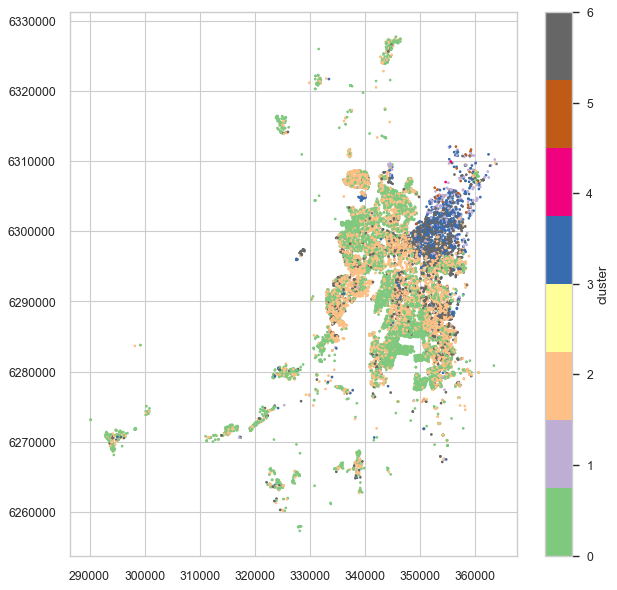

In [446]:

c = data_cluster_plot['cluster']
plt.figure(i)
#plt.title("Mapping of included households for the analysis", fontsize = 20)
# ax=santiago_zone.plot()
plt.figure(figsize=(9, 9), dpi=80)
plt.scatter(df['DirCoordX'],df['DirCoordY'],s=2,c=c,cmap = 'Accent') #Pass on the list created by the function here. Included data
ax.set_yticklabels([])
ax.set_xticklabels([])
cbar = plt.colorbar()
cbar.set_label('cluster')
plt.show()

In [447]:
gk = data_cluster_plot.groupby('cluster')
gk.first()

MontoArr  Sup_Prom_Constr_Hab_EOD  Calid_EOD_norm_inv  \
cluster                                                          
0          100000                     53.8                0.98   
1          800000                      0.0                1.00   
2          140000                     53.8                0.98   
3          500000                     59.6                0.98   
4         5000000                    138.9                0.00   
5         1800018                     44.9                0.36   
6          260000                     53.8                0.98   

         DensConstr_EOD  Dist_est_Metro_MC_KM  Dist_salida_Autop_MC_KM  \
cluster                                                                  
0                 0.059             23.051711                 4.345179   
1                 0.000              7.670263                 4.905052   
2                 0.059             20.104986                 0.606194   
3                 0.033             21.544286                 1.886487   
4                 0.186              7.572668                 4.159171   
5                 0.334              1.505601                 4.344469   
6                 0.059             21.090201                 1.662415   

         Tiempo_Com_Stgo  Ingreso_Promedio_Zona_MM   pca_Acc  
cluster                                                       
0                   69.0                  0.519765  0.003903  
1                   76.0                  0.472074  0.005610  
2                   69.0                  0.519765  0.003903  
3                   84.0                  0.678317  0.003903  
4                   65.0                  3.678246  0.005456  
5                   61.0                  0.626168  0.007433  
6                   69.0                  0.519765  0.003903

In [448]:
data_cluster_merged=pd.merge(df, data_cluster_plot[['cluster']],on = 'Hogar',left_index = True)

In [449]:
dg = data_cluster_merged.groupby('cluster')
# dg.first()

In [450]:
# Check the data with the months
data_cluster_mg = data_cluster_merged.groupby(['cluster','CLASE'])['CLASE'].count()
data_cluster_mg

cluster  CLASE
0        1.0      3841
         2.0      2776
         3.0       254
1        1.0         2
         2.0        33
         3.0       216
2        1.0      1878
         2.0      3176
         3.0      1015
3        1.0        31
         2.0       209
         3.0       662
4        3.0         2
5        1.0         1
         2.0         4
         3.0        32
6        1.0       213
         2.0       804
         3.0       898
Name: CLASE, dtype: int64

In [ ]:
#####################################################################################

In [ ]:
# inset rest

#(a)  NEW feature/features
#(b)  Research Questions
    #(i)  Question 1 (from assignment)
    #(ii)  Question 2 (maybe something with neighbourhoods)

In [140]:
df['DirCoordLat']

Hogar
100010   -33.729444
100020   -33.737278
100030   -33.805994
100041   -33.805995
100052   -33.722055
            ...    
700990   -33.760311
706781   -33.431388
706791   -33.431023
743813   -33.521961
743823   -33.522623
Name: DirCoordLat, Length: 16047, dtype: float64

# Prediction

## Data preperation
In the following the data will be separated into a train and a test set:

### Train and test split

In [173]:
### Change coordinates from UTM to Lat,Lon

#import utm #https://github.com/Turbo87/utm, how the UTM packaged works

# Converter from UTM coordinates to Longitude and Latitude coordinates, and updating DirCoordX and DirCoordY in the dataframe
df['DirCoordX'],df['DirCoordY'] = utm.to_latlon(df['DirCoordX'],df['DirCoordY'],19,'H')
#check: df['DirCoordX'][0]=-33.729444

#Renaming the columns, so we know in future work that the coordinates is changed
df = df.rename(columns= {'DirCoordX' : 'DirCoordLat', 'DirCoordY' : 'DirCoordLon'})

In [174]:
### Setting the features and target variables ## KAN DETTE SÆTTES UP AUTOMATISK SÅ VI FÅR TAGET ALLE KOLONNER MED?
# Kan måske sættes automatisk med columns.values
features_to_use = ['Sector', 'DirCoordLat', 'DirCoordLon', 'MontoArr','Sup_Prom_Constr_Hab_EOD', 'Calid_EOD_norm_inv', 'DensConstr_EOD', 'Dist_est_Metro_MC_KM', 'Dist_salida_Autop_MC_KM', 'Tiempo_Com_Stgo','Ingreso_Promedio_Zona_MM','pca_Acc']
target_variables = ['CLASE']

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

### Split data
# define cutoff between trainset and testset
testset_start_lon = -70.6
testset_start_lat = -33.4
testset_end_lon = -70.7
testset_end_lat = -33.5

# train/val/test split
### Train and validation set
# X_tv = df.loc[((df['DirCoordLat'] < testset_end_lat ) || (df['DirCoordLat'] > testset_start_lat) || (df['DirCoordLon'] < testset_end_lon ) || (df['DirCoordLon'] > testset_start_lon)), features_to_use]
# y_tv = df.loc[((df['DirCoordLat'] < testset_end_lat ) || (df['DirCoordLat'] > testset_start_lat) || (df['DirCoordLon'] < testset_end_lon ) || (df['DirCoordLon'] > testset_start_lon)), target_variables]

### Define testset
X_test = df.loc[((df['DirCoordLat'] > testset_end_lat ) & (df['DirCoordLat'] < testset_start_lat) & (df['DirCoordLon'] > testset_end_lon ) & (df['DirCoordLon'] < testset_start_lon)), features_to_use]
y_test = df.loc[((df['DirCoordLat'] > testset_end_lat ) & (df['DirCoordLat'] < testset_start_lat) & (df['DirCoordLon'] > testset_end_lon ) & (df['DirCoordLon'] < testset_start_lon)), target_variables]

index_drop = X_test.index
df_train = df.drop(index_drop)

X_tv = df_train[features_to_use]
y_tv = df_train[target_variables]
# X_tv = df_train.drop('CLASE')
# y_tv = df_train['CLASE']
### Split in train and validation set
X_train,X_val, y_train, y_val=train_test_split(X_tv, y_tv, train_size=0.7)
# df[features_to_use]

In [176]:
# ### Delete latitude and longitude features as we will not need them any more, we have used them to split into train and test
del X_train['DirCoordLat'], X_train['DirCoordLon']
del X_test['DirCoordLat'], X_test['DirCoordLon']
del X_val['DirCoordLat'], X_val['DirCoordLon']

### Creating dummies

In [177]:
X_train_dum = X_train[['Sector']].copy()
X_val_dum = X_val[['Sector']].copy()
X_test_dum = X_test[['Sector']].copy()

del X_train['Sector']
del X_val['Sector']
del X_test['Sector']

In [178]:
### Creating dummies for three features
X_train_dum=pd.get_dummies(X_train_dum, columns=['Sector'])  #this creates dummies for the "time_of_day" variable.
X_val_dum=pd.get_dummies(X_val_dum, columns=['Sector'])  #this creates dummies for the "time_of_day" variable.
X_test_dum=pd.get_dummies(X_test_dum, columns=['Sector'])  #this creates dummies for the "time_of_day" variable.


In [179]:
### Standardize the rest of the data (not dummies) 
X_mean = X_train.mean(axis = 0)
X_std = X_train.std(axis = 0)
X_train = (X_train - X_mean) / X_std
X_val = (X_val - X_mean)/ X_std
X_test = (X_test - X_mean) / X_std

In [180]:
#Merging standardized data with dummies
X_train = X_train.merge(X_train_dum,left_index=True, right_index=True , how='left')
X_val = X_val.merge(X_val_dum, left_index=True, right_index=True , how='left')
X_test = X_test.merge(X_test_dum, left_index=True, right_index=True , how='left')


## Models

In the following, two general functions are defined: 

    1) Evaluation function for evaluation of the prediction model
    2) Function for plot of confusion matrix

In [181]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

classes_names = np.array(['Class 1', 'Class 2', 'Class 3'])
title_CM='Confusion matrix'
# function to evaluate predictions
def evaluate(y_true, y_pred,cmap=plt.cm.Blues,classes = classes_names, title = title_CM,normalize=False ):
    # calculate and display confusion matrix
    labels = np.unique(y_true)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
#     print('Confusion matrix\n- x-axis is true labels (Class 1, Class 2, etc.)\n- y-axis is predicted labels')
#     print(cm) # this will print a simple confusion matrix
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(False)
    

    # calculate precision, recall, and F1 score
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    print("accuracy:", accuracy)
    print("precision:", precision)
    print("recall:", recall)
    print("f1 score:", f1)
    
    return ax

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from IPython.display import display
pd.options.display.max_columns = None
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py


def plot_confusion_matrix(y_true, y_pred,classes,normalize=False,title=None,cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred);
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(False)
    return ax


np.set_printoptions(precision=2)

### Logistic Regression

The first model to apply is the logistic regression. 
Before fitting the model a gridsearch is applied to tune and find the best values for the parameters:

In [183]:
# Gridsearch
# https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/
# Create logistic regression
# Class_weight to tune model
LogReg= LogisticRegression(random_state=42,multi_class = 'ovr',solver = 'liblinear')
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 40, 100)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(LogReg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train.values.ravel())

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
# best_model.predict(X_train)



Best Penalty: l1
Best C: 1.0


Now that the value for the parameters are found, the Logistic Regression can be defined:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score of the LogReg 0.4994263862332696
- Train set results:
accuracy: 0.5704105509466071
precision: 0.531589909743115
recall: 0.5577950461389024
f1 score: 0.5443772958881384
- Test set results:
accuracy: 0.4994263862332696
precision: 0.47058823529411764
recall: 0.5356521739130434
f1 score: 0.5010166734444895

Feature pca_Acc is irrelevant


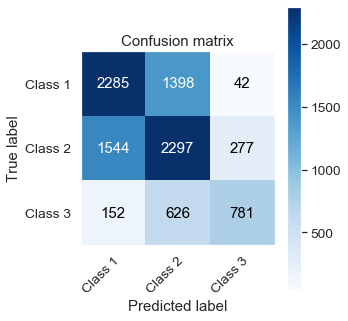

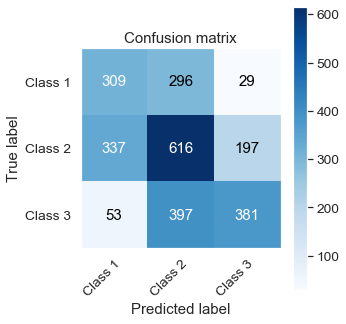

In [184]:
### Logistic Regression ###
### Define model
cmap=plt.cm.Blues

# LogReg= LogisticRegression(random_state=42)
LogReg= LogisticRegression(random_state=42,multi_class = 'ovr',solver = 'liblinear',penalty = 'l1', C = 1 )

# Train model (fit model)
LogReg.fit(X_train,y_train)

# Score model
LogReg.score(X_test,y_test)
print('Score of the LogReg',LogReg.score(X_test,y_test))

### Define test and train prediction
y_pred_train_lg = LogReg.predict(X_train)
y_pred_test_lg = LogReg.predict(X_test)

### Evaluation
print("- Train set results:")
evaluate(y_train, y_pred_train_lg)
print("- Test set results:")
evaluate(y_test, y_pred_test_lg)
print("")
for i in range(len(features_to_use)):
    if LogReg.coef_[0][i] == 0:
        print("Feature %s is irrelevant" % (features_to_use[i],))

plt.show();

In [185]:
LogReg.coef_

array([[-1.44,  0.02, -0.25, -0.2 , -0.01,  0.03,  0.02, -0.99,  0.17,
        -0.  , -0.4 ,  0.  ,  0.  , -0.54,  0.16],
       [-0.06, -0.04,  0.02,  0.01, -0.07, -0.02, -0.02, -0.02, -0.12,
         0.  ,  0.1 , -0.61, -0.32,  0.  , -0.41],
       [ 0.83,  0.16,  0.  ,  0.06,  0.42,  0.17, -0.02,  0.69,  0.49,
        -0.38,  0.  , -0.26, -0.37,  0.12,  0.02]])

### Random Forest

The second model applied is the random forest. Grid search is again applied to tune the parameters:

In [188]:
#Inspiration from the script from https://www.kaggle.com/sociopath00/random-forest-using-gridsearchcv
rfc = RandomForestClassifier(random_state = 42)
 
param_grid = {
    'n_estimators' : list(range(10,101,10)), # default is 10 (will be changed to 100 in a new version)
    'max_features' : [5, 11,15],
    'max_depth' : [5,15]
}

clf_rf = GridSearchCV(estimator = rfc, param_grid = param_grid, cv=5, verbose=0)
clf_rf.fit(X_train, y_train.values.ravel())
clf_rf.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 20}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


- Train set results:
accuracy: 0.5965751967666454
precision: 0.5499038256037615
recall: 0.624817872753764
f1 score: 0.5849721495964534
- Test set results:
accuracy: 0.5307839388145316
precision: 0.4922887106724244
recall: 0.6939130434782609
f1 score: 0.5759653554673404



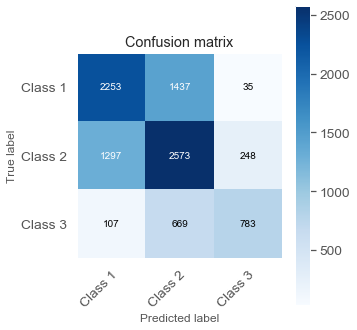

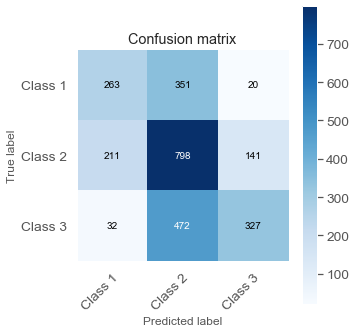

In [189]:
### RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42, n_estimators = 40, max_features = 5,max_depth = 5)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

print("- Train set results:")
evaluate(y_train, y_pred_rf_train)
print("- Test set results:")
evaluate(y_test, y_pred_rf_test)
print("")

# print(rf.score(X_test, y_test))
# evaluate(y_test,y_pred_rf);

###### Check overfit in the above!

### Neural Networks - Keras

The third and last model is neural networks with keras.


In [186]:
import pandas
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from keras import regularizers
%matplotlib inline
import matplotlib.pyplot as plt

#matplotlib style options
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 8)

Using TensorFlow backend.


In [190]:
# encode class values as integers for y_train, y_val and y_test
encoder1 = LabelEncoder()
encoder1.fit(y_test.values.ravel())
encoded_ytest = encoder1.transform(y_test.values.ravel())
# convert integers to dummy variables (i.e. one hot encoded)
y_test_enc = np_utils.to_categorical(encoded_ytest)
########################
encoder2 = LabelEncoder()
encoder2.fit(y_train.values.ravel())
encoded_ytrain = encoder2.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
y_train_enc = np_utils.to_categorical(encoded_ytrain)
#########################
encoder3 = LabelEncoder()
encoder3.fit(y_val.values.ravel())
encoded_yval = encoder3.transform(y_val)
# convert integers to dummy variables (i.e. one hot encoded)
y_val_enc = np_utils.to_categorical(encoded_yval)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# function to fit nnet
def fit_nnet(X_train, y_train, X_val, y_val,inputDimension, num_epochs=15, batch_size=2048):
    # define the keras model
    model = Sequential()
    model.add(Dense(250, input_dim=inputDimension, activation='relu',kernel_regularizer=regularizers.l1(0.001) ))
    model.add(Dropout(rate=0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(3, activation='sigmoid'))

    # compile the keras model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit the keras model on the dataset
    history = model.fit(X_train, y_train, validation_data=(X_val,y_val),
                        epochs=num_epochs, batch_size=batch_size, verbose=2)
    
    return model, history


In [ ]:
# Model
inputDimension_nn = len(X_train.columns)
fitted_model, history = fit_nnet(X_train, y_train_enc, X_val, y_val_enc, inputDimension_nn, num_epochs=40, batch_size=2100)


In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, constrained_layout=True,figsize=(15,5))
ax0.plot(history.history["loss"])
ax0.plot(history.history["val_loss"])
ax0.legend(["train loss", "val loss"])

ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.legend(["train accuracy", "val accuracy"])
plt.show();

In [ ]:
y_pred = fitted_model.predict(X_test)
evaluate(np.argmax(y_test_enc,axis = 1)+1,np.argmax(y_pred,axis = 1)+1)
plt.show();

In [ ]:
# inset rest
#(a)  Preparation of data for input to models
#(b)  Models:  
    # LogReg
    # RandomForest
    # Keras
#(c)  Fit and prediction of models

In [ ]:
# model_cv = KerasClassifier(build_fn = fit_nnet, epochs = 10, batch_size = 25)
# batch_sizes = [10,20,50]
# epochs = [5,10,50]
# parameters = {'batch_size':batch_sizes,'epochs':epochs}
# clf_cv_keras = GridsearchCV(model_cv,parameters)

# Conclusion

In [10]:
# inset rest